# **Unsupervised Learning Practice Project Solution: Fantasy Sports Clustering Analysis**

--------------------------------
## **Context**
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The soccer (globally - football) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a global surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials based on previous season performances. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [416]:
!pip install scikit-learn-extra

In [417]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings("ignore")

In [418]:
from google.colab import drive
drive.mount('/MIT_Class')

Drive already mounted at /MIT_Class; to attempt to forcibly remount, call drive.mount("/MIT_Class", force_remount=True).


In [419]:
data = pd.read_csv("/MIT_Class/MyDrive/Colab_Notebooks/fpl_data.csv")

In [420]:
#number of rows and  columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


* The dataset has 476 rows and 13 columns.

In [421]:
# Viewing 10 random rows of the data
data.sample(n=10)


,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
429,Darren Randolph,West Ham United,Goalkeeper,0,0,10,270,3,0.0,46.2,0,0,1
322,Hannibal Mejbri,Manchester United,Midfielder,0,0,1,8,0,0.0,1.2,0,0,0
329,Nemanja Matic,Manchester United,Midfielder,0,1,36,1101,18,149.0,218.4,80,0,4
57,Adam Lallana,Brighton and Hove Albion,Midfielder,1,1,58,1584,18,355.7,255.2,302,2,5
350,Jamal Lewis,Newcastle United,Defender,0,1,44,1833,37,224.8,272.6,47,3,3
83,Yves Bissouma,Brighton and Hove Albion,Midfielder,1,0,77,3112,42,295.5,523.6,196,2,11
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
381,Moussa Djenepo,Southampton,Midfielder,1,2,46,1229,27,97.7,178.0,170,0,3
35,Douglas Luiz Soares de Paulo,Aston Villa,Midfielder,0,2,72,2781,41,304.5,403.4,189,0,12
450,Adama Traore,Wolverhampton Wanderers,Midfielder,2,4,94,2640,41,751.0,475.4,645,5,7


**Observations:**

- The data has players from various clubs.
- There seem to be a lot of players playing in the midfield.
- Some players have played less or zero minutes in the previous season and so they have scored few or zero fantasy points, respectively.

In [422]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [423]:
# Checking datatypes and number of non-null values for each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [424]:
#confirm no null values
df.isnull().sum()


,0
Player_Name,0
Club,0
Position,0
Goals_Scored,0
Assists,0
Total_Points,0
Minutes,0
Goals_Conceded,0
Creativity,0
Influence,0


- `Player_Name`, `Club`, and `Position` are categorical variables.
- All the other columns in the data are numeric in nature.

In [425]:
# Checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values in the data.

- There are no missing values in the data.

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data.**

In [426]:
df['Position'].value_counts(normalize=True)

,proportion
Position,
Midfielder,0.409664
Defender,0.361345
Forward,0.134454
Goalkeeper,0.094538


In [427]:
df['Club'].value_counts(normalize=True)

,proportion
Club,
Arsenal,0.063025
Crystal Palace,0.063025
Leeds United,0.060924
West Ham United,0.060924
Tottenham Hotspurs,0.060924
Newcastle United,0.060924
Leicester City,0.060924
Manchester United,0.058824
Chelsea,0.058824


In [428]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


**Observations:**

- There are players from 17 clubs in the data.
- Most of the players in the data play in midfield.
- The average number of minutes played is ~1350.
- Players scored an average of ~60 fantasy points in the previous season.
- More than 50% of the players in the data have scored one or no goals.
- 50% of the players in the data have assisted no goals.

### **Univariate Analysis**

Goals_Scored


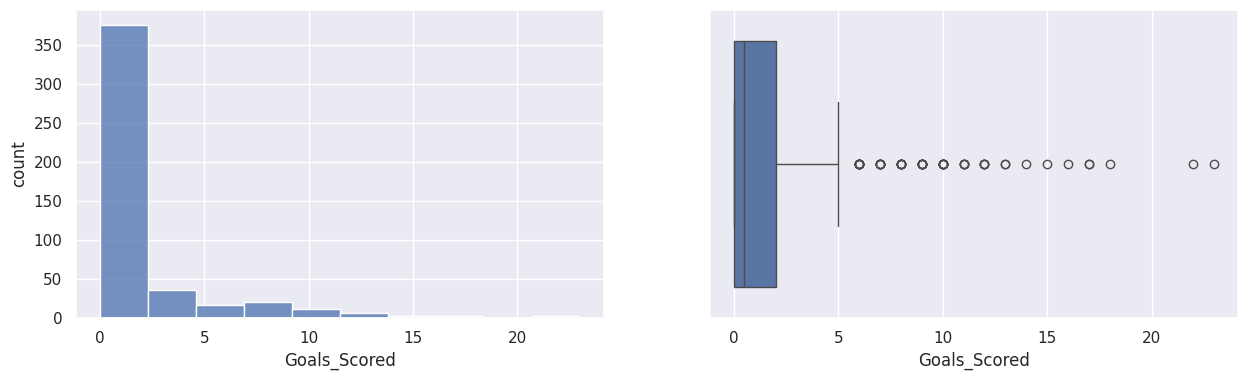

Assists


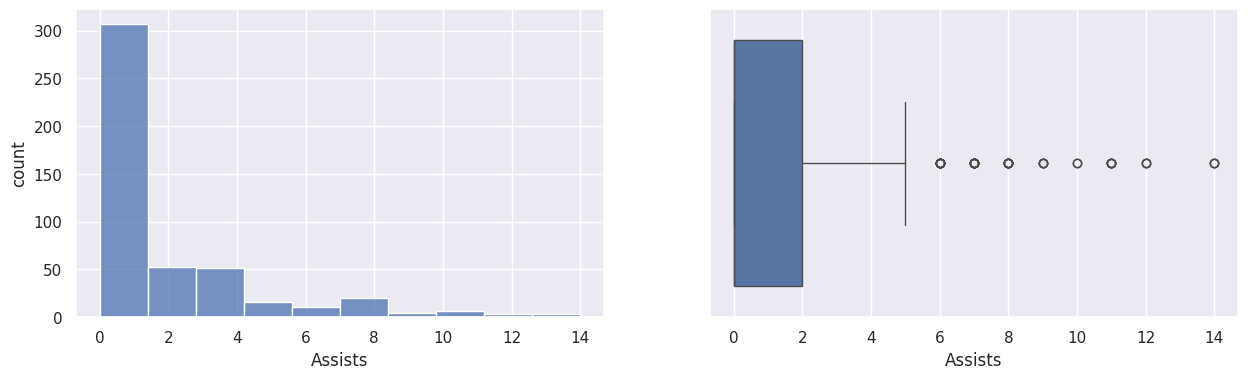

Total_Points


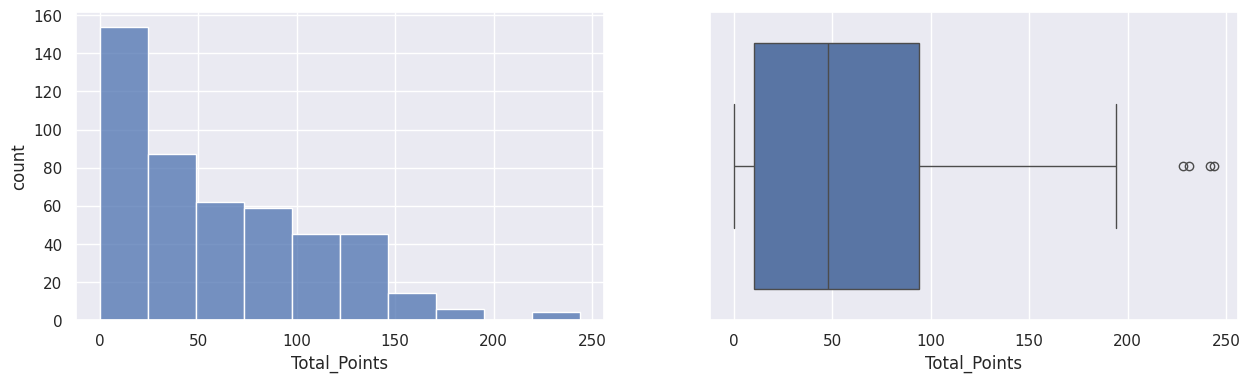

Minutes


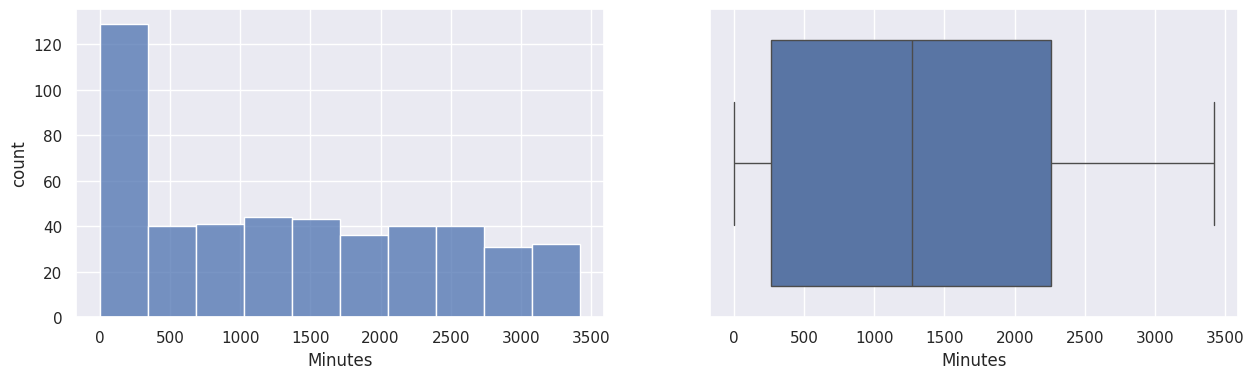

Goals_Conceded


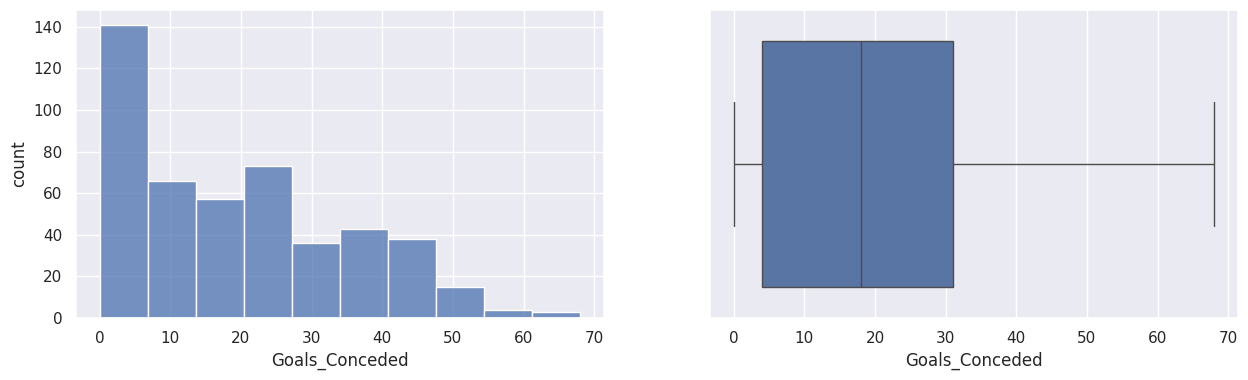

Creativity


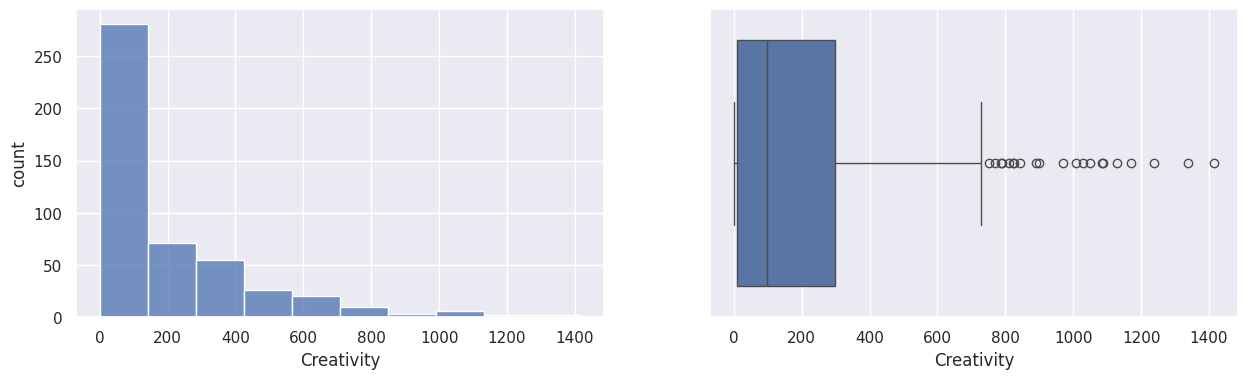

Influence


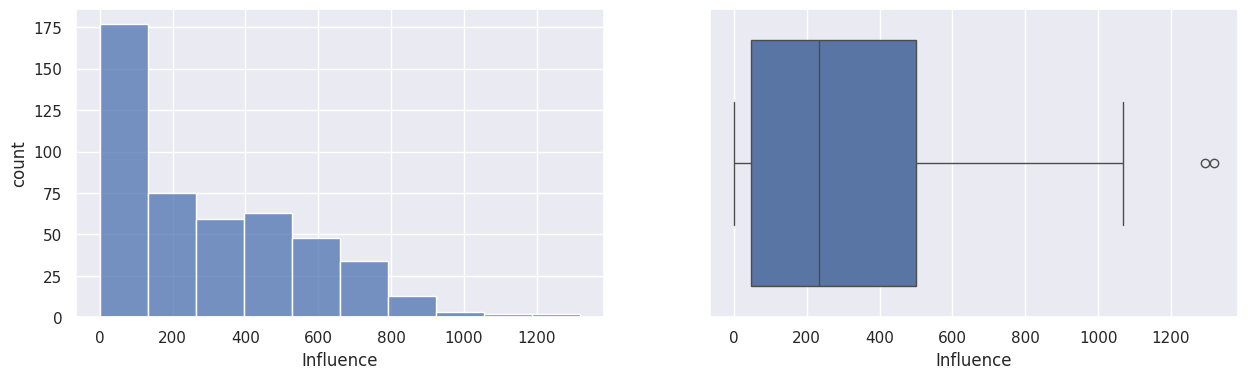

Threat


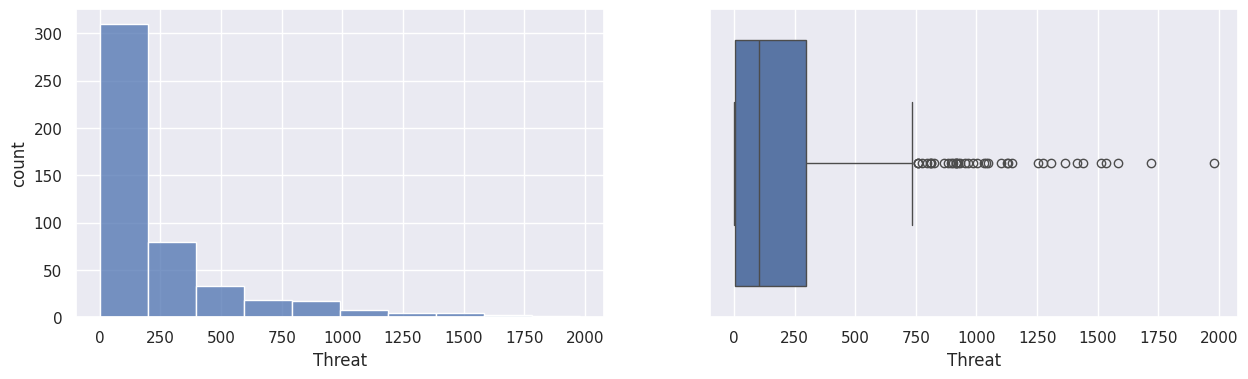

Bonus


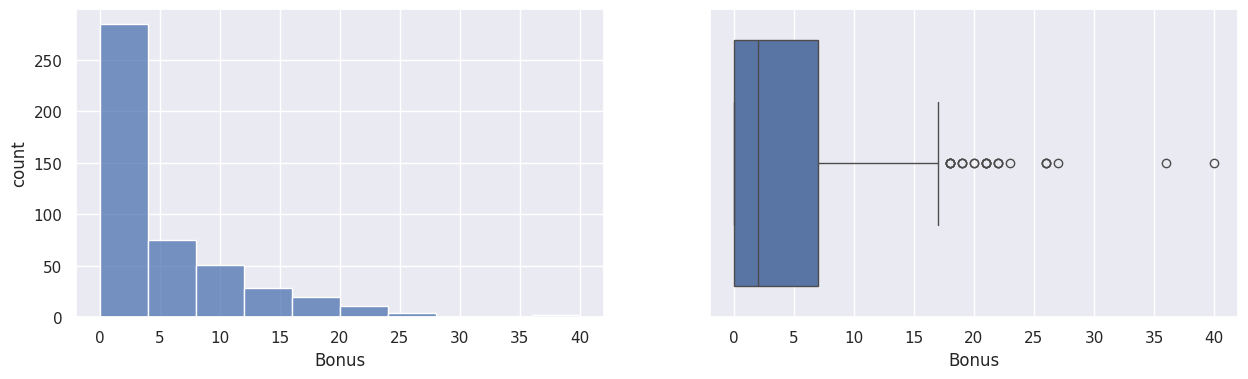

Clean_Sheets


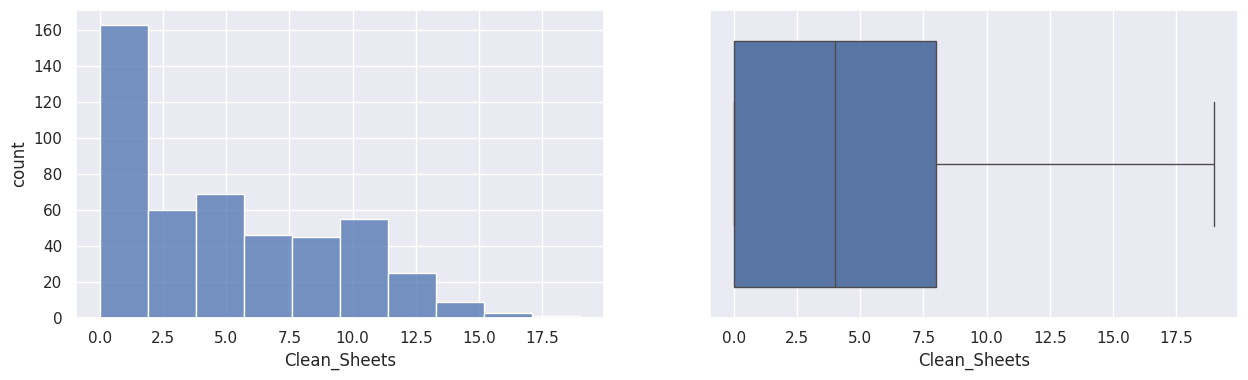

In [429]:
# Function to plot a boxplot and a histogram along the same scale
num_cols = df.select_dtypes(include='number').columns.tolist()

for col in num_cols:
    print(col) #prints column name above chart
    plt.figure(figsize=(15,4)) #define the plot size
    plt.subplot(1,2,1) #this builds one row and two columns. The one at the end means the hist plot comes first
    sns.histplot(data=data, x=col, bins=10); #inserts the col from the loop and builds the histogram
    plt.ylabel('count')# puts count label on y-axis
    plt.subplot(1,2,2) #this means boxplot is in second column
    sns.boxplot(data=data, x=col) #inserts the col from the loop nad builds the histogram

    plt.show()




**`Goals_Scored`**

- The distribution is right-skewed and very few players have scored more than 15 goals.

**`Assists`**

- The distribution is right-skewed and very few players have assisted more than 8 goals.

**`Goals_Conceded`**

- The distribution is slightly right-skewed and ~50% of the players have conceded 20 or less goals.

**`Clean_Sheets`**

- The distribution is slightly right-skewed and 50% of the players have kept 4 or less clean sheets.

**`Minutes`**

- The distribution looks close to uniform, and 50% of the players have played ~1250 or more minutes.
- Many players did not play even a single minute of football last season.

**`Total_Points`**

- The distribution is right-skewed, and more than 50% of the players have scored more than 50 fantasy points.
- Many players scored no fantasy points last season.
- There are a few outliers, suggesting that these players scored a lot more fantasy points than the others.

**`Creativity`**

- The distribution is right-skewed and few players have a creativity score of more than 500.

**`Influence`**

- The distribution is right-skewed and few players have a influence score of more than 800.

**`Threat`**

- The distribution is right-skewed and few players have a threat score of more than 500.

**`Bonus`**

- The distribution is right-skewed and very few players received more than 20 bonus fantasy points last season.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Brighton and Hove Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Chelsea'),
  Text(5, 0, 'Crystal Palace'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Leeds United'),
  Text(8, 0, 'Leicester City'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Manchester City'),
  Text(11, 0, 'Manchester United'),
  Text(12, 0, 'Newcastle United'),
  Text(13, 0, 'Southampton'),
  Text(14, 0, 'Tottenham Hotspurs'),
  Text(15, 0, 'West Ham United'),
  Text(16, 0, 'Wolverhampton Wanderers')])

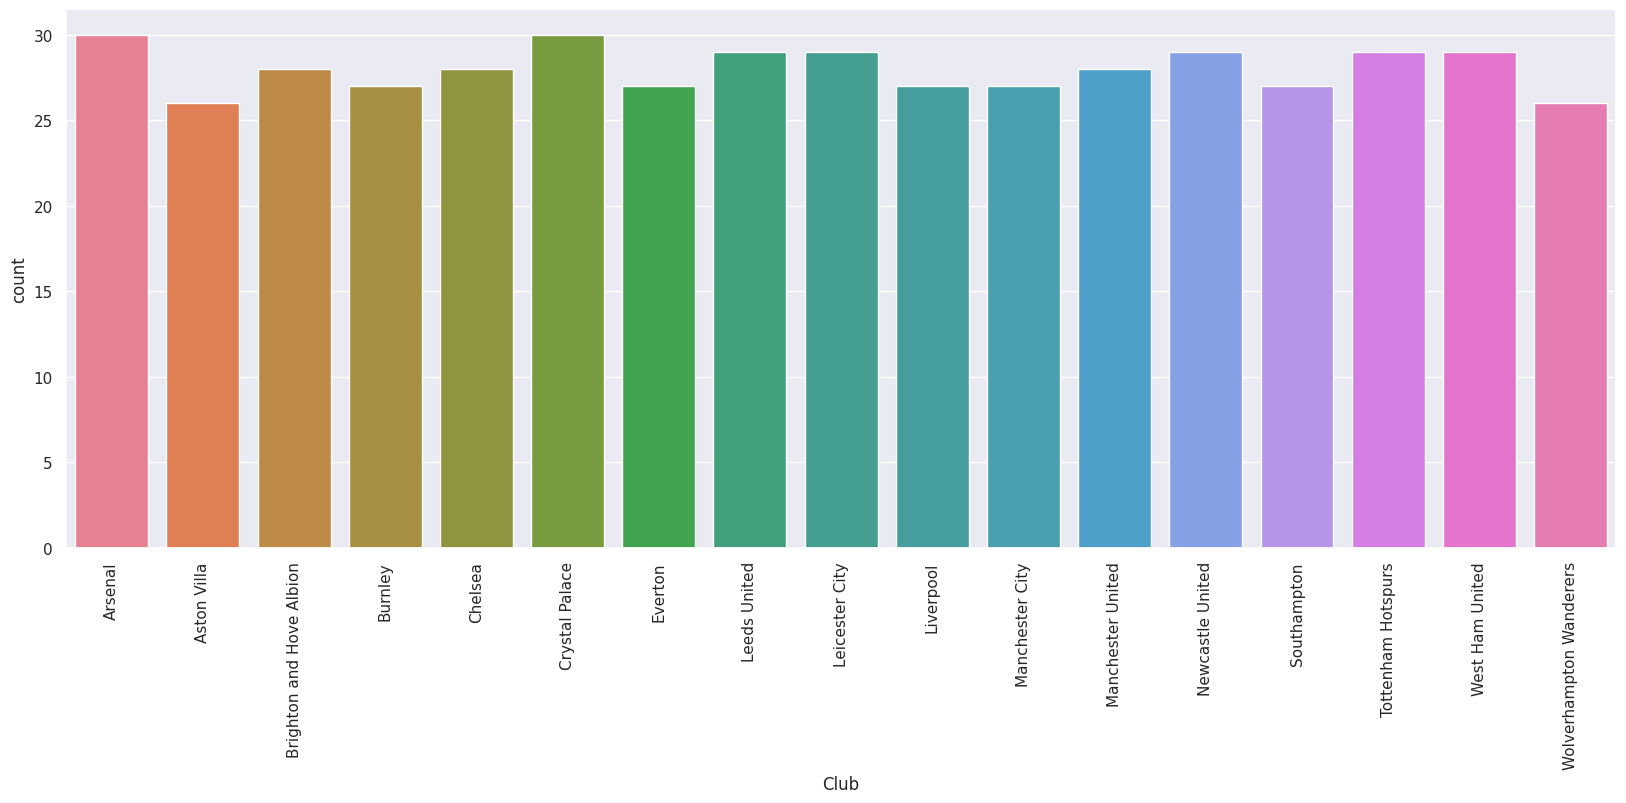

In [430]:
# Function to create labeled barplots
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='Club', hue='Club')
plt.xticks(rotation=90)






**`Club`**

- The number of players in each club is almost uniformly distributed.
- All the clubs have at least 26 players.

**`Position`**

<Axes: xlabel='Position', ylabel='count'>

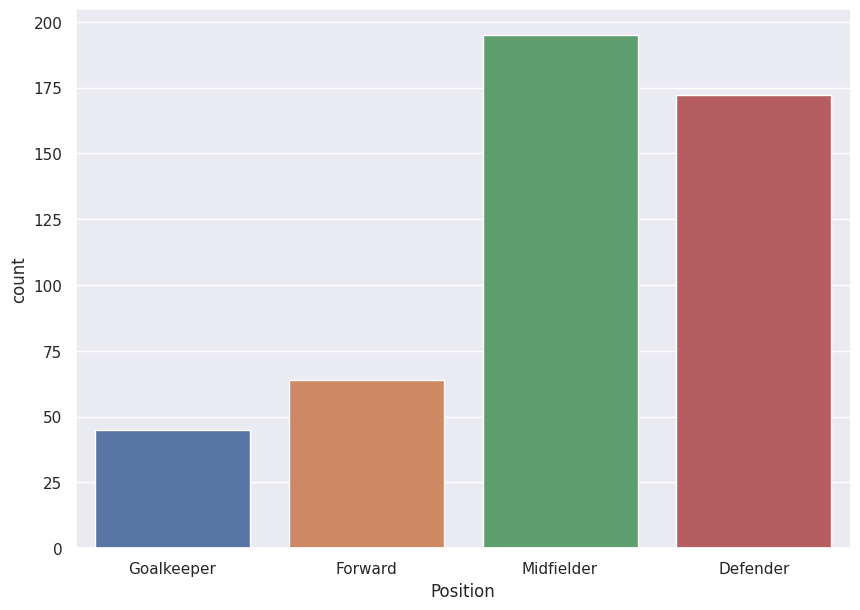

In [431]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Position', hue='Position')

- The number of midfielders in the data is more than four times the number of goalkeepers.
    - This makes sense as a team can only play one goalkeeper in a match, so it doesn't make sense to have too many goalkeepers in the squad.
- The number of defenders in the data is nearly 3 times the number of forwards.
    - This has more to do with the formation in which the teams prefer to play nowadays.
    - Most teams tend to have 1 or 2 forwards only.

### **Bivariate Analysis**

<Axes: >

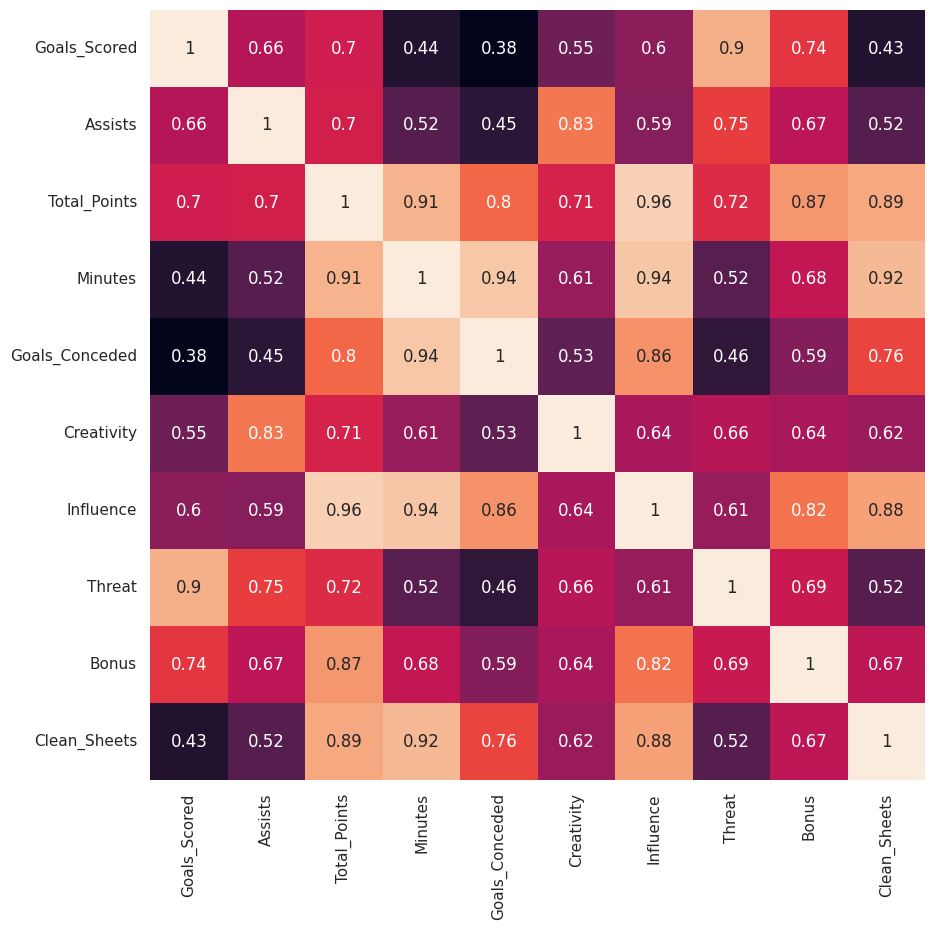

In [432]:
# Correlation check
plt.figure(figsize=(10,10))
num_cols = df.select_dtypes(include='number').columns.tolist()
sns.heatmap(data=df[num_cols].corr(), annot=True, cbar=False)


**Observations:**

- Many variables show a high correlation with each other.

- The number of goals scored by a player and the threat score of the player is highly correlated.
    - This makes sense as the threat score gauges a player's goalscoring potential.

- Influence score is highly correlated with the total fantasy points scored and the number of minutes played by a player.
    -  This makes sense as these players have a higher impact on the game's outcome, so they tend to play for long each game and score more fantasy points.

**Let's check players from which team have scored the most fantasy points on average.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Brighton and Hove Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Chelsea'),
  Text(5, 0, 'Crystal Palace'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Leeds United'),
  Text(8, 0, 'Leicester City'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Manchester City'),
  Text(11, 0, 'Manchester United'),
  Text(12, 0, 'Newcastle United'),
  Text(13, 0, 'Southampton'),
  Text(14, 0, 'Tottenham Hotspurs'),
  Text(15, 0, 'West Ham United'),
  Text(16, 0, 'Wolverhampton Wanderers')])

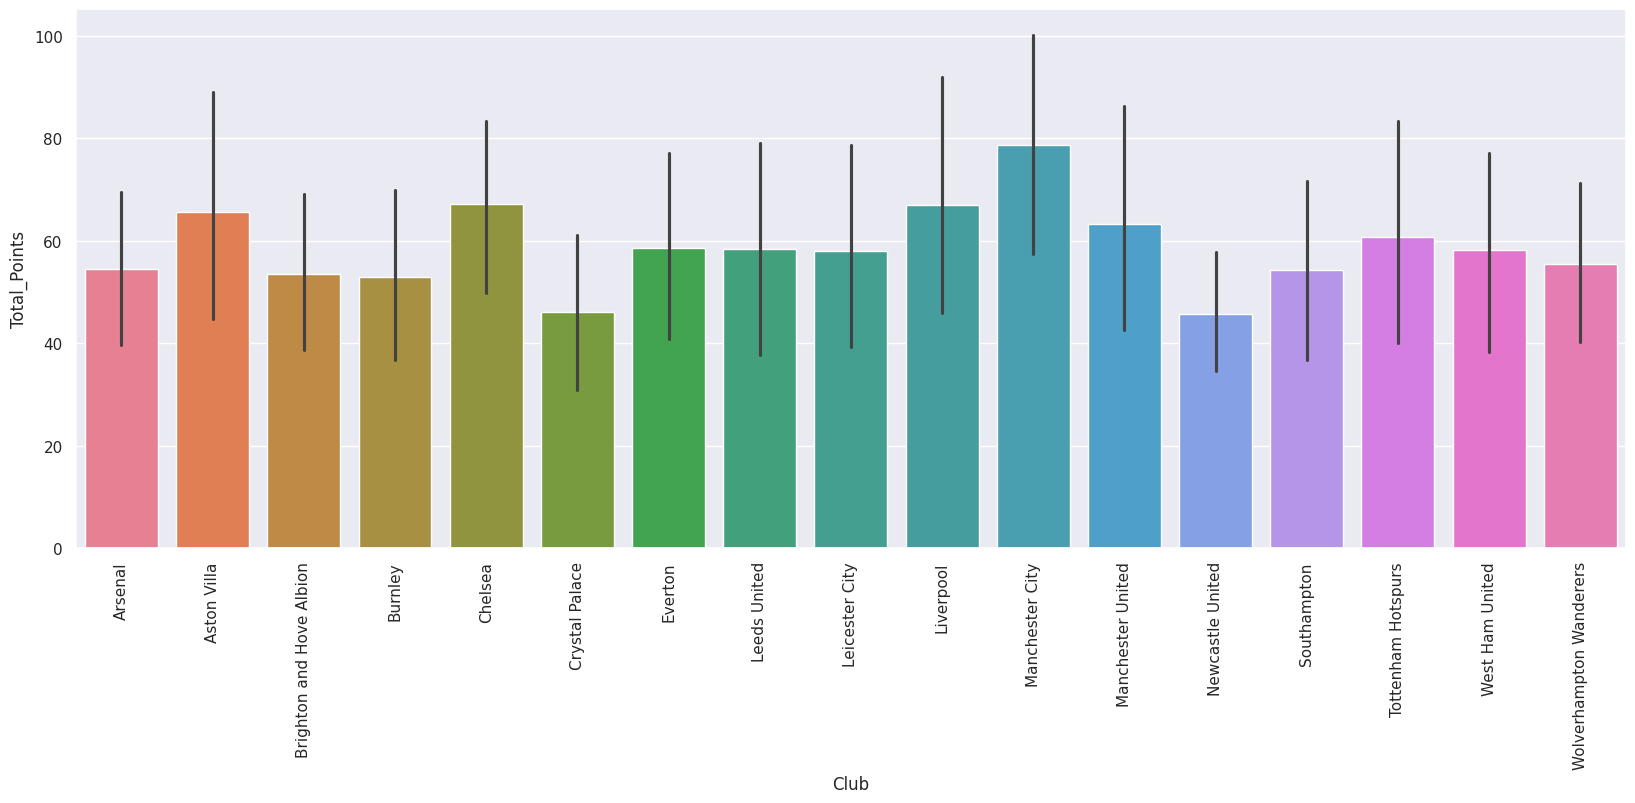

In [433]:
# Function to create labeled barplots
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='Club', y='Total_Points', hue="Club")
plt.xticks(rotation=90)

- Looks like it is favorable to keep players from Manchester City in a fantasy team as they tend to score more fantasy points on average.

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

([0, 1, 2, 3],
 [Text(0, 0, 'Goalkeeper'),
  Text(1, 0, 'Forward'),
  Text(2, 0, 'Midfielder'),
  Text(3, 0, 'Defender')])

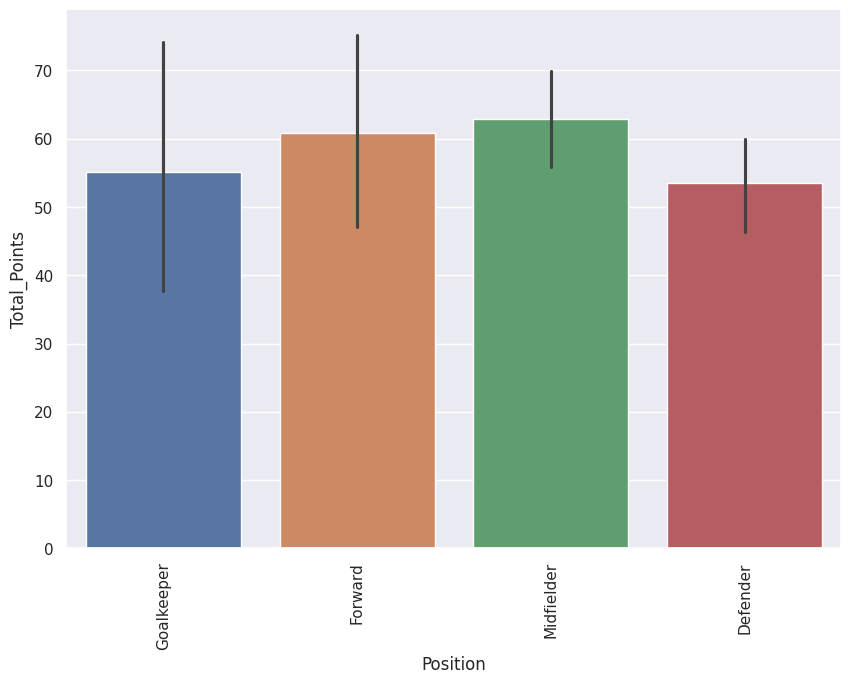

In [434]:
# Function to create labeled barplots
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Position', y='Total_Points', hue="Position")
plt.xticks(rotation=90)

- Midfielders tend to fetch the most number of points for fantasy managers on average.

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

([0, 1, 2, 3],
 [Text(0, 0, 'Goalkeeper'),
  Text(1, 0, 'Forward'),
  Text(2, 0, 'Midfielder'),
  Text(3, 0, 'Defender')])

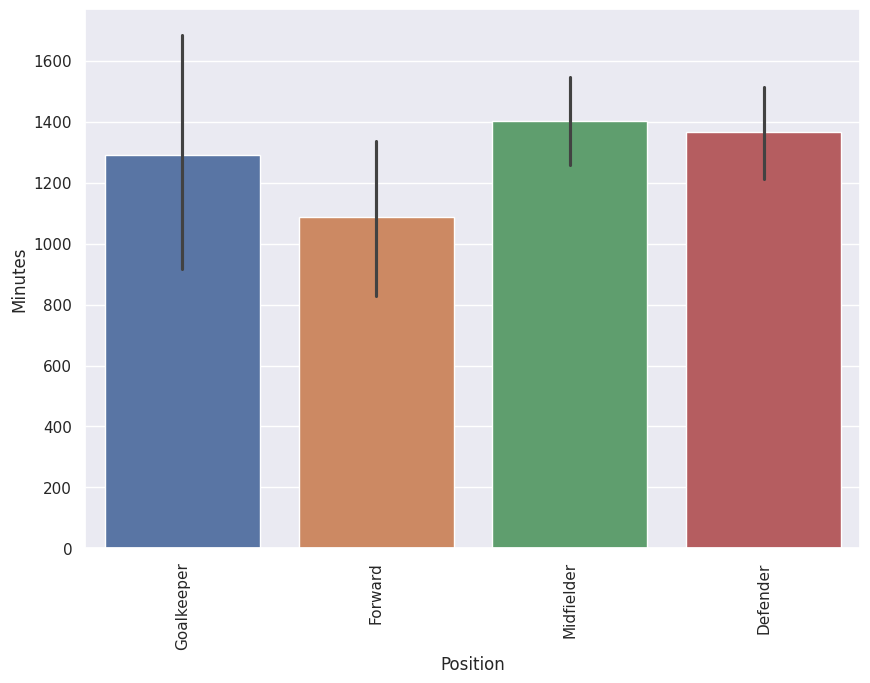

In [435]:
# Function to create labeled barplots
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Position', y='Minutes', hue="Position")
plt.xticks(rotation=90)

- Players in the midfield and defense tend to play more minutes on average than forwards and goalkeepers.

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston Villa'),
  Text(2, 0, 'Brighton and Hove Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Chelsea'),
  Text(5, 0, 'Crystal Palace'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Leeds United'),
  Text(8, 0, 'Leicester City'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Manchester City'),
  Text(11, 0, 'Manchester United'),
  Text(12, 0, 'Newcastle United'),
  Text(13, 0, 'Southampton'),
  Text(14, 0, 'Tottenham Hotspurs'),
  Text(15, 0, 'West Ham United'),
  Text(16, 0, 'Wolverhampton Wanderers')])

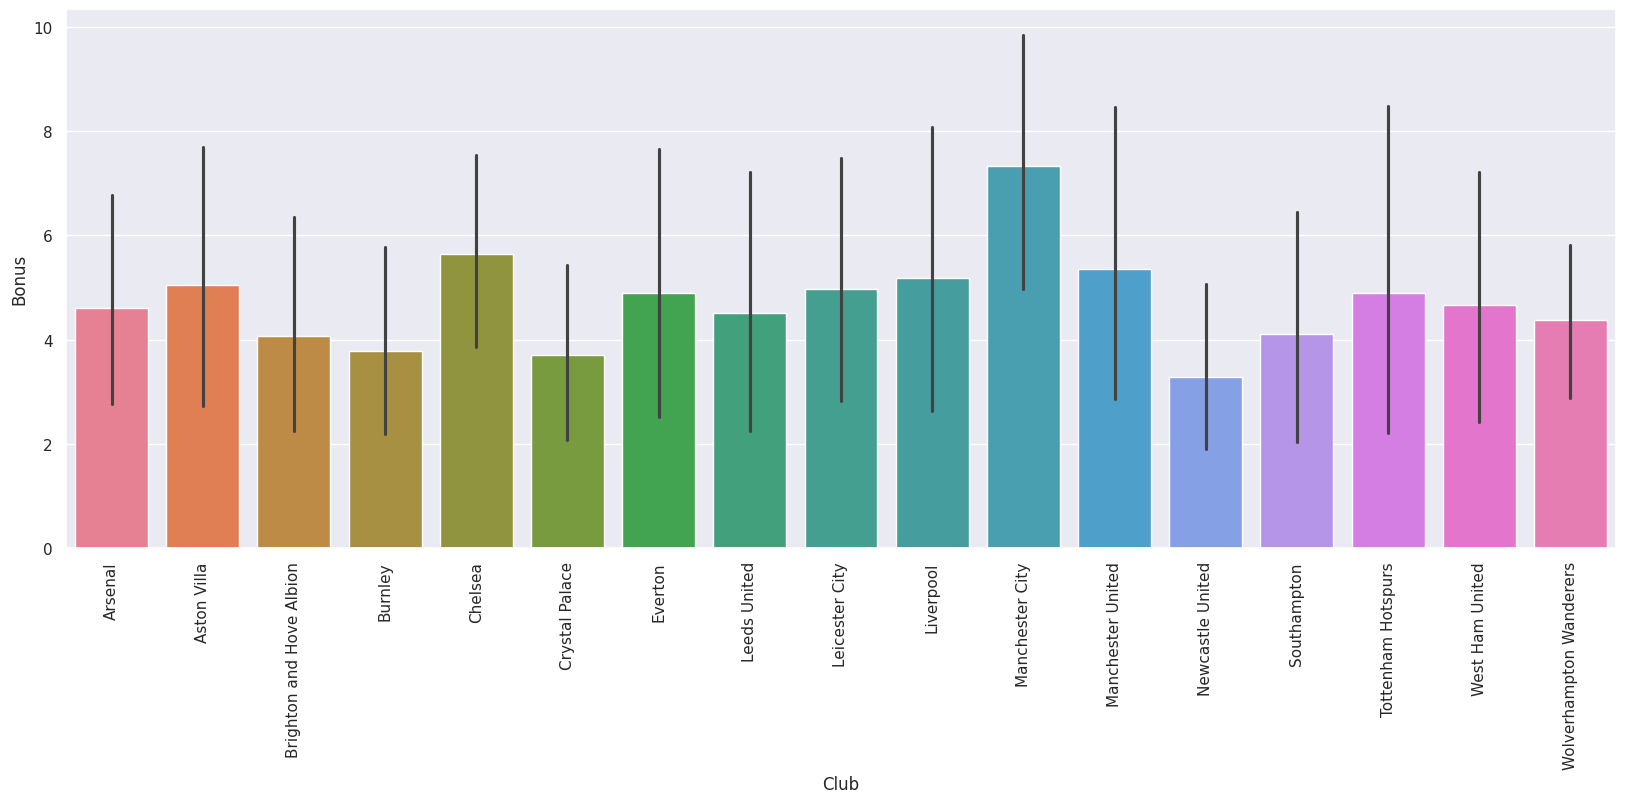

In [436]:
# Function to create labeled barplots
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='Club', y='Bonus', hue="Club")
plt.xticks(rotation=90)

- It's Manchester City again! The players of this club seem to be great fantasy picks.

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [437]:
max_points = pd.DataFrame(df.groupby(['Position'])['Total_Points'].max())

df_new = pd.merge(df, max_points, how='inner', on='Total_Points')
df_new.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15
1,Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.6,756.8,527,15,12
2,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
3,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12


- No Manchester City players here! That's surprising.

**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [438]:
df_sorted = df.groupby('Position').apply(lambda x: x.sort_values('Total_Points', ascending=False).head(10)).reset_index(drop=True)
df_sorted

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.6,756.8,527,15,12
1,Andrew Robertson,Liverpool,Defender,1,8,161,3384,42,1129.3,754.4,359,19,12
2,Trent Alexander-Arnold,Liverpool,Defender,2,8,160,3029,40,1238.8,789.6,529,26,10
3,Aaron Cresswell,West Ham United,Defender,0,11,153,3170,41,898.6,669.4,96,21,11
4,Aaron Wan-Bissaka,Manchester United,Defender,2,5,144,3060,36,498.2,785.4,159,11,13
5,Ruben Dias,Manchester City,Defender,1,1,142,2843,21,91.0,651.6,218,12,17
6,Benjamin Chilwell,Chelsea,Defender,3,6,139,2286,23,535.8,545.0,408,11,12
7,Matt Targett,Aston Villa,Defender,0,4,138,3404,44,607.0,690.4,122,9,16
8,Joao Cancelo,Manchester City,Defender,2,4,138,2298,21,673.0,569.8,394,18,14
9,Lewis Dunk,Brighton and Hove Albion,Defender,5,0,130,2932,40,136.7,720.4,443,17,11


**Let's see the distribution of teams now.**

- Most of the top 10 players across different positions are from Manchester City and Liverpool.

### **Checking Outliers**

- Let's plot the boxplots of all numerical columns to check for outliers.

Goals_Scored
Assists
Total_Points
Minutes
Goals_Conceded
Creativity
Influence
Threat
Bonus
Clean_Sheets


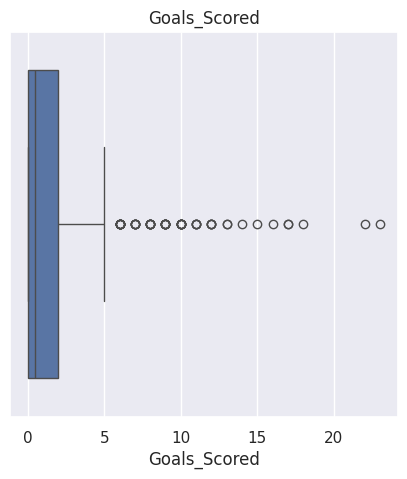

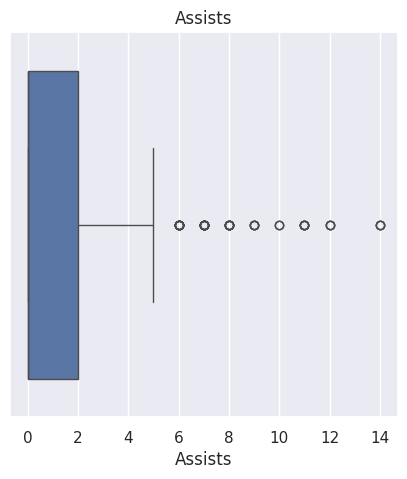

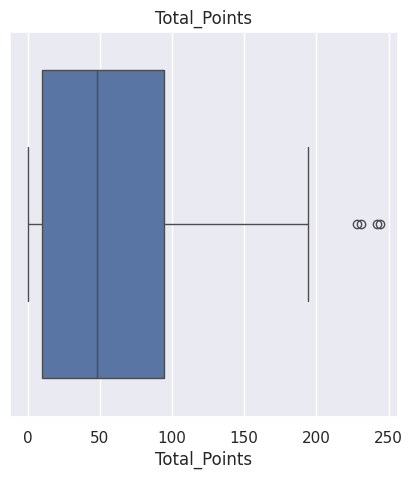

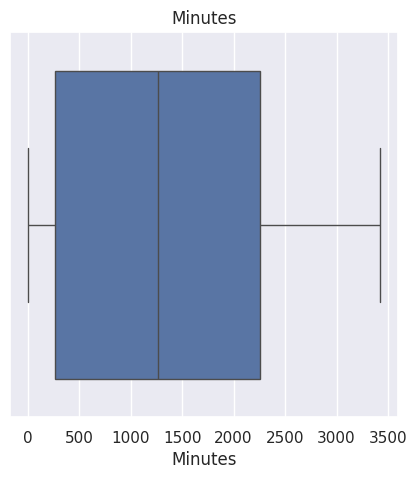

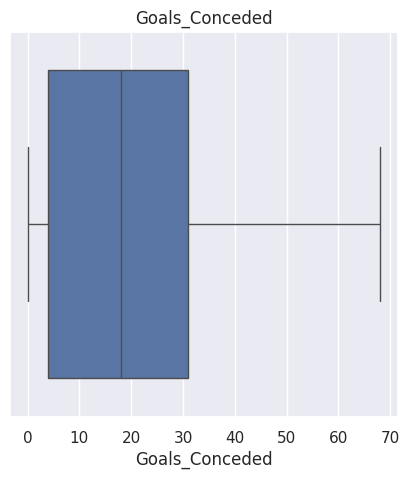

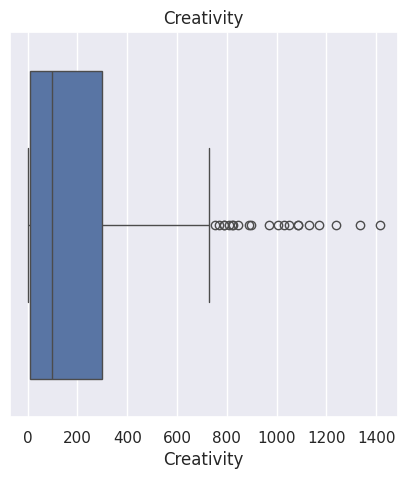

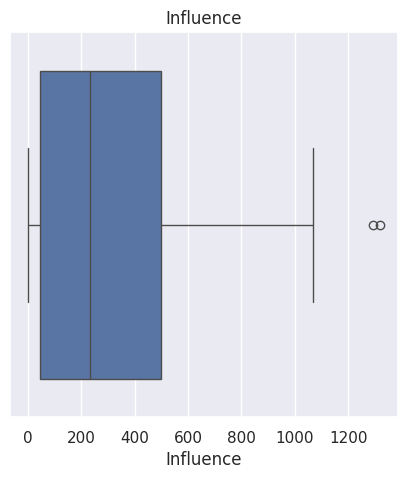

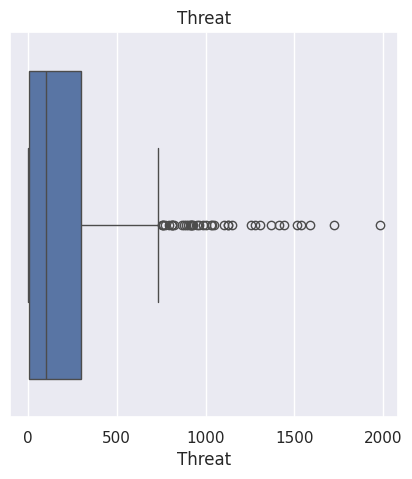

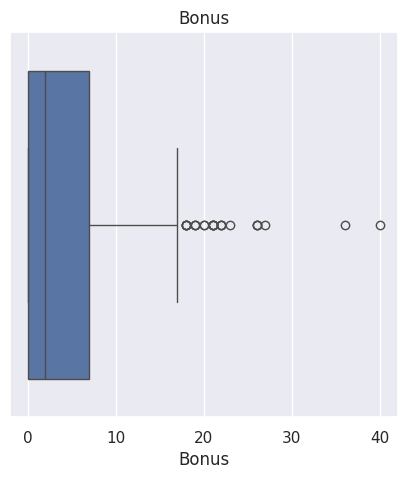

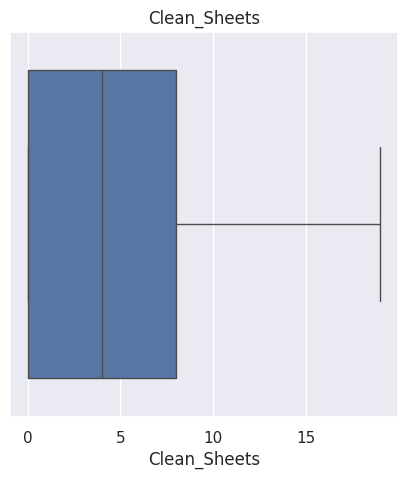

In [439]:


num_cols = df.select_dtypes(include='number').columns.tolist()

for col in num_cols:
    print(col)
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.show()

- There are some outliers in the data.
- We will not treat them as they are proper values.

## **Scaling**

- Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering.

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [441]:
# Scaling the data before clustering

#define number columns
num_cols = df.select_dtypes(include='number').columns.tolist()

df_num = df[num_cols]
df_num.info()

#bring in the library with the instructions for standardizing vars
scaler=StandardScaler()

#Convert the numeric vars in df to standardized form
df_scaled=pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_scaled.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Goals_Scored    476 non-null    int64  
 1   Assists         476 non-null    int64  
 2   Total_Points    476 non-null    int64  
 3   Minutes         476 non-null    int64  
 4   Goals_Conceded  476 non-null    int64  
 5   Creativity      476 non-null    float64
 6   Influence       476 non-null    float64
 7   Threat          476 non-null    int64  
 8   Bonus           476 non-null    int64  
 9   Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 37.3 KB


,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510


## **Applying PCA**

- PCA can help to mitigate the effects of collinearity by identifying the most important variables or features that explain the maximum variance in the data. The principal components generated by PCA are uncorrelated with each other, which can reduce the redundancy in the data and can make the clustering more robust.

In [442]:
# Importing PCA
from sklearn.decomposition import PCA

n=df_scaled.shape[1]
pca = PCA(n_components=n, random_state=1)
pca_scores = pd.DataFrame(pca.fit_transform(df_scaled))
exp_var = pca.explained_variance_ratio_

In [443]:
exp_var

array([0.72148934, 0.13659346, 0.05880028, 0.03138379, 0.02274545,
       0.01522727, 0.00700781, 0.00393725, 0.00194529, 0.00087005])

In [444]:
#show the PCA
pca_scores.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877


Text(0, 0.5, 'Cumulative Explained Variance')

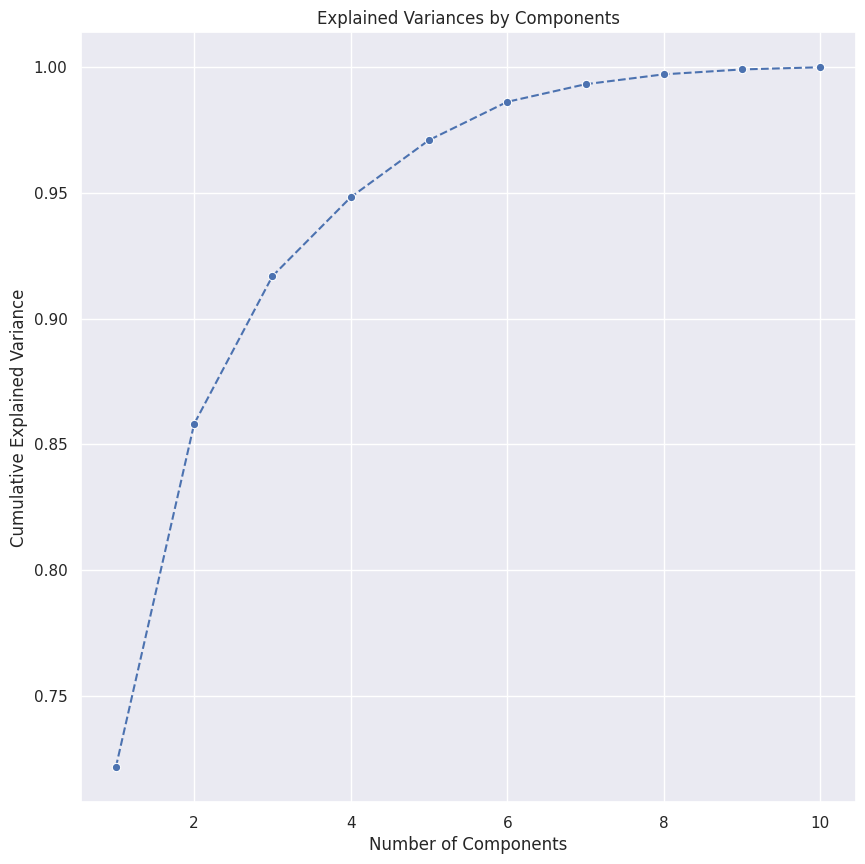

In [445]:
#create the elbow chart
# visualize the explained variance by individual components
plt.figure(figsize = (10,10)) # sets the size of the chart
sns.lineplot(x=range(1, 11), y=exp_var.cumsum(), marker='o', linestyle='--')

#x=range(1,10) creates a range from 1 to 9 which is the number of PCs
#exp_var.cumsum() – exp_var has the PC variance explained values and cumsum() is a function that sums of the inputs

plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")


In [446]:
pca_cols = ['PC1','PC2','PC3']
pca_loads = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pca_cols,columns=df_scaled.columns)

In [447]:
pca_loads.T

,PC1,PC2,PC3
Goals_Scored,0.28,0.46,-0.45
Assists,0.29,0.35,0.48
Total_Points,0.36,-0.08,-0.10
Minutes,0.33,-0.37,0.01
Goals_Conceded,0.30,-0.39,-0.01
Creativity,0.30,0.19,0.65
Influence,0.35,-0.22,-0.14
Threat,0.30,0.42,-0.20
Bonus,0.32,0.12,-0.25
Clean_Sheets,0.32,-0.31,0.05


In [448]:
def color_high(val): # defines function and the input is the high or low values
    if val <= -0.30: # you can decide any value as per your understanding. If value is LT -.4 it is pink
        return 'background: pink'
    elif val >= 0.30:
        return 'background: skyblue'


In [449]:
pca_loads.T.style.applymap(color_high)

,PC1,PC2,PC3
Goals_Scored,0.280000,0.460000,-0.450000
Assists,0.290000,0.350000,0.480000
Total_Points,0.360000,-0.080000,-0.100000
Minutes,0.330000,-0.370000,0.010000
Goals_Conceded,0.300000,-0.390000,-0.010000
Creativity,0.300000,0.190000,0.650000
Influence,0.350000,-0.220000,-0.140000
Threat,0.300000,0.420000,-0.200000
Bonus,0.320000,0.120000,-0.250000
Clean_Sheets,0.320000,-0.310000,0.050000


Text(0, 0.5, 'PC2')

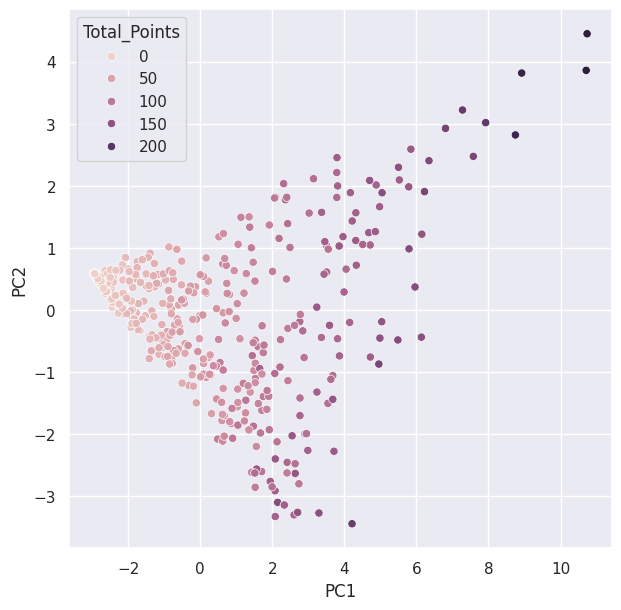

In [450]:
df_concat = pd.concat([df, pca_scores], axis=1)
plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='Total_Points')
plt.xlabel("PC1")
plt.ylabel("PC2")


In [451]:
df_concat.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,0,1,2,3,4,5,6,7,8,9
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877


## **K-Means Clustering**

- K-Means clustering is one of the most popular clustering algorithms used for partitioning a dataset into K clusters. The algorithm works by iteratively assigning each data point to one of the K clusters based on the proximity of the data points to the centroids of the clusters. K-Means clustering is a computationally efficient algorithm that can work well even for datasets with a large number of variables.

- The steps involved in K-Means clustering are as follows:
    - Choose the number of clusters K that you want to partition the data into.
    - Initialize the K centroids randomly.
    - Assign each data point to the nearest centroid.
    - Recalculate the centroids of each cluster as the mean of all the data points assigned to it.
    - Repeat steps 3 and 4 until the centroids no longer change or a maximum number of iterations is reached.

In [452]:
k_means_df = pca_scores.copy()

In [453]:
# Empty dictionary to store the SSE for each value of K
sse = {}

for k in range(1, 15):
#will create cluster solutions for 1 to 14 clusters

  kmeans = KMeans(n_clusters = k, random_state = 1).fit(k_means_df)
#must be indented because it is a loop
#create a k means clustering model with k clusters.  Random_state is a seed for reproducability
#the n_clusters = k pulls the number from the loop
#fit_scaled(df_scaled) – fits the Kmeans model to the scaled data (df_scaled)

  sse[k] = kmeans.inertia_
#must be indented because the inertia value is calculated for each k which means it is inside the loop and not outside
#This measures how well the clusters fit the data.  It stores the calculated SSE (aka inertia) for the current k solution in the sse dictionary with k as the key

kmeans

KMeans(n_clusters=14, random_state=1)

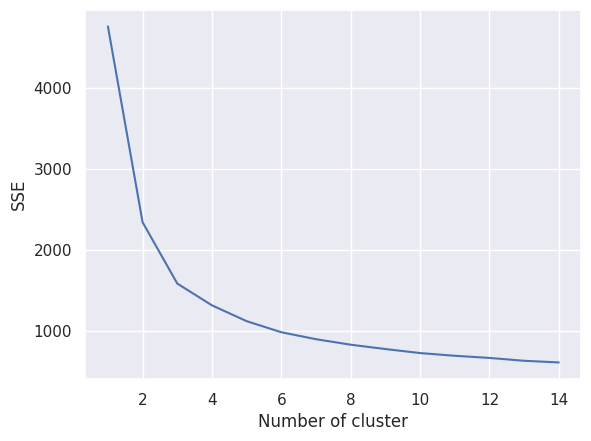

In [454]:
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
#For this lineplot we do not have a data= option because we are passing in the values directly as a list
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [455]:
# Empty dictionary to store the Silhouette score for each value of K
sc = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(k_means_df)
#Like above this takes the loop values and creates a cluster solution for each
    labels = kmeans.predict(k_means_df)
#This assigns each data point to a cluster
    sc[k] = silhouette_score(k_means_df, labels)
#We swap out the SSE from above with the silhouette score which results in a more definitive elbow plot
#SSE just measures distance between the point and the cluster center – inter cluster distance – the lower the score the better
#Silhouette measures both how close the points are to the cluster center AND how far the points of one cluster are from the points in other clusters – both inter and intra cluster distances – the higher the score the better


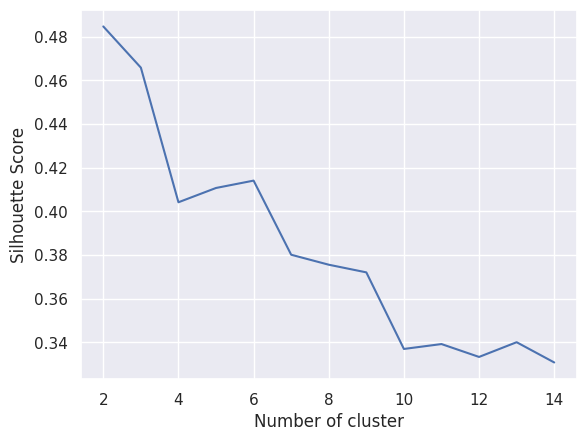

In [456]:
sns.lineplot(x=list(sc.keys()), y=list(sc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**

- From the point at 4, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

**We will move ahead with k = 4.**

In [457]:
# with the optimal number of clusters identified,  build the final model
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init="auto").fit(k_means_df)
#This just runs the final model and then fits it to the scaled data

kmeans


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [458]:
# Creating a copy of the original data
df_copy = df.copy()

# Create cluster labels
cluster_labels = kmeans.predict(k_means_df)

# With the model built, add predicted labels to the original data
df_copy['KMeans_Labels'] = cluster_labels
#and the scaled data
k_means_df['KMeans_Labels'] = cluster_labels

#This adds the predicted cluster values to the data df with the column name ‘Kmeans_Labels’
#We don’t need to merge or concat because the rows in the df and vector align.  This is the direct way to merge two pieces of data.  Just need to make sure the rows correspond to each other as a perfect one-to-one join

In [459]:
df_copy.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KMeans_Labels
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,1
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,2
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,2
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,3


In [460]:
k_means_df.head()

,0,1,2,3,4,5,6,7,8,9,KMeans_Labels
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269,1
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019,2
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656,0
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934,2
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877,3


In [461]:
df_copy['KMeans_Labels'].value_counts().sort_index()

,count
KMeans_Labels,
0,99
1,188
2,60
3,129


### **Cluster Profiles**

In [464]:
profiles = df_copy.groupby('KMeans_Labels').mean(numeric_only = True)
profiles["seg_count"] = (df_copy.groupby("KMeans_Labels")["Total_Points"].count().values)
profiles

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,seg_count
KMeans_Labels,,,,,,,,,,,
0,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
1,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188
2,9.183333,6.716667,142.150000,2457.266667,33.516667,623.141667,664.133333,880.533333,16.266667,9.250000,60
3,1.503876,1.604651,56.038760,1392.736434,20.573643,188.358915,270.818605,223.255814,3.356589,4.705426,129


In [485]:
# Let's see the names of the players in each cluster
df_sorted = df_copy.sort_values('KMeans_Labels')
cluster_0 = df_sorted[df_sorted['KMeans_Labels'] == 0][['Player_Name']]
cluster_0['Player_Name'].unique()

array(['Joel Ward', 'Tanguy Ndombele', 'Cesar Azpilicueta',
       'Toby Alderweireld', 'Miguel Almiron', 'Benjamin Chilwell',
       'Karl Darlow', 'Nick Pope', 'Matthew Lowton', 'Jonjo Shelvey',
       'Josh Brownhill', 'Angelo Ogbonna', 'James Justin',
       'James Tarkowski', 'Declan Rice', 'Dwight McNeil', 'Jonny Evans',
       'Charlie Taylor', 'Kasper Schmeichel', 'Ashley Westwood',
       'Yves Bissouma', 'Robert Sanchez', 'Timothy Castagne',
       'Lukasz Fabianski', 'Lewis Dunk', 'Wesley Fofana', 'Wilfred Ndidi',
       'Joel Veltman', 'Edouard Mendy', 'Alex McCarthy',
       'Sergio Reguilon', 'Jorge Luiz Frello Filho', 'Kyle Walker-Peters',
       'Ben Godfrey', 'Ryan Bertrand', 'Jordan Pickford',
       'Abdoulaye Doucoure', 'Stuart Armstrong', 'Vicente Guaita',
       'Lucas Digne', 'Mason Holgate', 'Michael Keane',
       'Jannik Vestergaard', 'Jan Bednarek', 'Luka Milivojevic',
       'Alisson Becker', 'Ruben Dias', 'Eric Dier', 'Illan Meslier',
       'Cheikhou Kouya

In [486]:
cluster_1 = df_sorted[df_sorted['KMeans_Labels'] == 1][['Player_Name']]
cluster_1['Player_Name'].unique()

array(['Joao Virginia', 'Kamil Miazek', 'Jay-Roy Grot', 'Axel Tuanzebe',
       'Anthony Elanga', 'Taylor Harwood-Bellis', 'Zack Steffen',
       'Jordan Stevens', 'Leif Davis', 'Jonjoe Kenny', 'Moise Kean',
       'Jack Jenkins', 'Alex Nicolao Telles', 'Nathan Broadhead',
       'Niels Nkounkou', 'Joshua King', 'Kgaogelo Chauke', 'Robin Olsen',
       'Nathan Ake', 'Adam Forshaw', 'Jamie Shackleton',
       'Brandon Williams', 'Luke Mbete', 'Francisco Casilla',
       'Gaetano Berardi', 'Fraser Forster', 'Liam Delap',
       'Ian Carlo Poveda-Ocampo', 'Amad Diallo', 'Nicolas Otamendi',
       'Jake Vokins', 'Shola Shoretire', 'Xherdan Shaqiri', 'Eric Garcia',
       'Florian Lejeune', 'Nathan Bishop', 'Elliot Anderson',
       'Michael Obafemi', 'Joel Matip', 'Dwight Gayle', 'Luke Thomas',
       'Odion Ighalo', 'DeAndre Yedlin', 'Andy Carroll', 'Sidnei Tavares',
       'Thakgalo Leshabela', 'Vontae Daley-Campbell', 'Wes Morgan',
       'Divock Origi', 'William Fish', 'Adrian Castillo

In [487]:
cluster_2 = df_sorted[df_sorted['KMeans_Labels'] == 2][['Player_Name']]
cluster_2['Player_Name'].unique()

array(['Pedro Lomba Neto', 'Jarrod Bowen', 'Callum Wilson',
       'Jesse Lingard', 'Heung-Min Son', 'Michail Antonio',
       'Bruno Fernandes', 'Edinson Cavani', 'Che Adams', 'Pablo Fornals',
       'Danny Ings', 'Gareth Bale', 'Harry Kane', 'Luke Shaw',
       'Marcus Rashford', 'Tomas Soucek', 'Aaron Cresswell',
       'James Ward-Prowse', 'James Maddison', 'Riyad Mahrez',
       'Youri Tielemans', 'Jack Grealish', 'Ollie Watkins',
       'Kelechi Iheanacho', 'Jamie Vardy', 'Harvey Barnes',
       'Leandro Trossard', 'Christian Benteke', 'Neal Maupay',
       'Pascal Gross', 'Stuart Dallas', 'Chris Wood', 'Rodrigo Moreno',
       'Raphael Dias Belloli', 'Patrick Bamford', 'Jack Harrison',
       'Richarlison de Andrade', 'James Rodriguez', 'Gylfi Sigurdsson',
       'Dominic Calvert-Lewin', 'Wilfried Zaha', 'Mason Mount',
       'Timo Werner', 'Andrew Robertson', 'Bertrand Traore',
       'Eberechi Eze', 'Roberto Firmino', 'Sadio Mane',
       'Gabriel Fernando de Jesus', 'Alexandr

In [488]:
cluster_3 = df_sorted[df_sorted['KMeans_Labels'] == 3][['Player_Name']]
cluster_3['Player_Name'].unique()

array(['Matej Vydra', 'Robbie Brady', 'Johann Berg Gudmundsson',
       'Calum Chambers', 'Arthur Masuaku', 'Andreas Christensen',
       'Jeff Hendrick', 'Antonio Rudiger', 'Callum Hudson-Odoi',
       'Willian Borges Da Silva', 'Steven Bergwijn', 'Hakim Ziyech',
       'Serge Aurier', 'Kai Havertz', 'Marcos Alonso', 'Moussa Sissoko',
       'Matt Doherty', 'Lucas Moura', 'Mateo Kovacic', "N'Golo Kante",
       'Olivier Giroud', 'Tammy Abraham', 'Christian Pulisic',
       'Craig Dawson', 'Daniel Ceballos', 'Jack Cork', 'Thomas Partey',
       'Max Kilman', 'Mahmoud Ahmed Ibrahim Hassan', 'Fabio Silva',
       'Daniel Castelo Podence', 'Mohamed Naser El Sayed Elneny',
       'Ross Barkley', 'Aaron Connolly', 'Adam Lallana',
       'Sebastian Haller', 'Said Benrahma', 'Alexis Mac Allister',
       'Dan Burn', 'Danny Welbeck', 'Martin Odegaard',
       'Gabriel Maghalaes', 'Solomon March', 'Steven Alzate',
       'Tariq Lamptey', 'Ashley Barnes', 'Emile Smith Rowe', 'Issa Diop',
       

- Cluster 1 has no forwards, so it is likely to have players with more defensive duties in the team.
- Cluster 2 has no goalkeepers, so it is likely to have players with more offensive duties in the team.

**Let's plot the boxplot**

In [489]:
df_sorted.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KMeans_Labels
152,Joel Ward,Crystal Palace,Defender,0,1,66,2255,43,118.2,366.8,28,6,7,0
419,Tanguy Ndombele,Tottenham Hotspurs,Midfielder,3,3,99,2086,24,270.8,408.0,281,7,12,0
116,Cesar Azpilicueta,Chelsea,Defender,1,2,113,2187,20,413.3,502.2,164,12,13,0
420,Toby Alderweireld,Tottenham Hotspurs,Defender,1,0,88,2240,25,106.5,559.8,178,4,10,0
360,Miguel Almiron,Newcastle United,Midfielder,4,2,97,2426,48,447.3,452.6,425,8,5,0


In [492]:
#create a list of the variables you would like to chart
num_cols = df_sorted.select_dtypes(include='number').columns.tolist()
num_cols

['Goals_Scored',
 'Assists',
 'Total_Points',
 'Minutes',
 'Goals_Conceded',
 'Creativity',
 'Influence',
 'Threat',
 'Bonus',
 'Clean_Sheets',
 'KMeans_Labels']

Goals_Scored


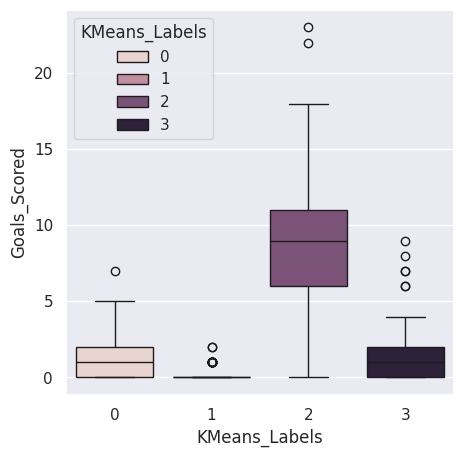

Assists


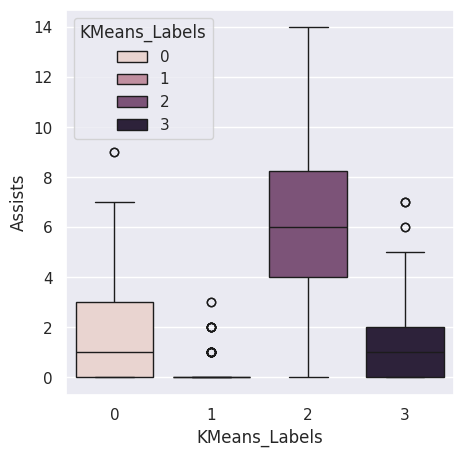

Total_Points


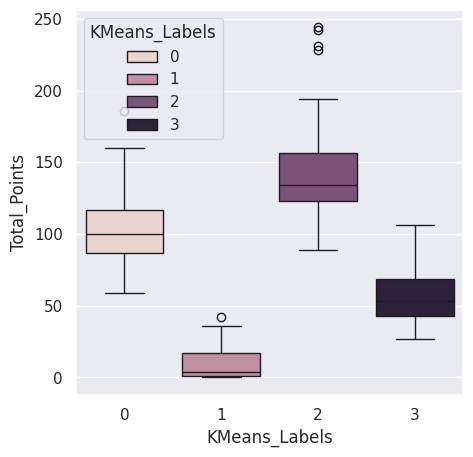

Minutes


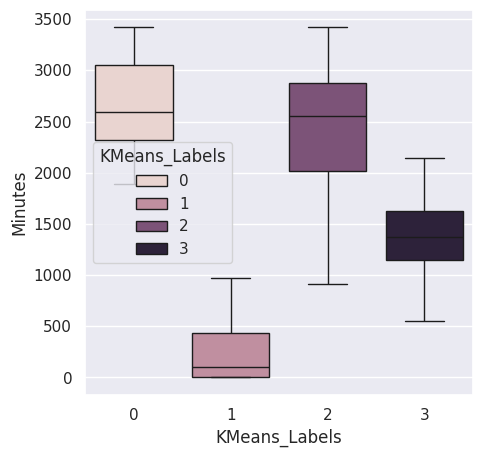

Goals_Conceded


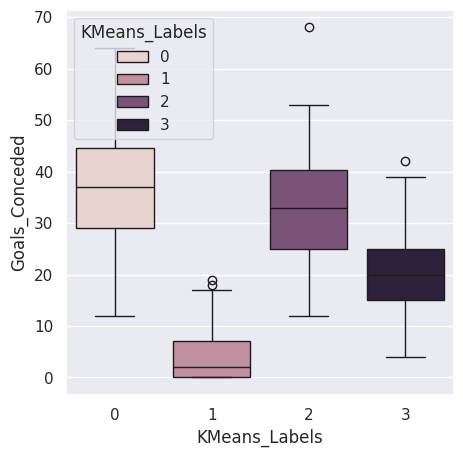

Creativity


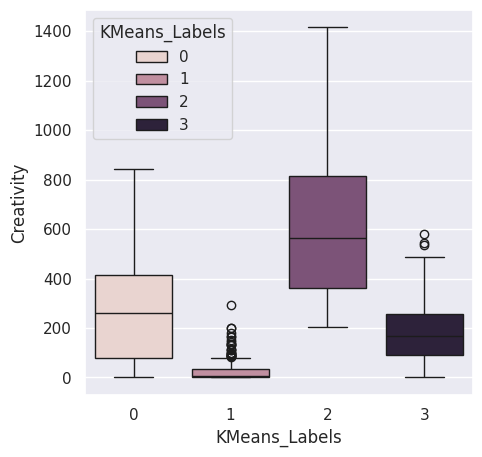

Influence


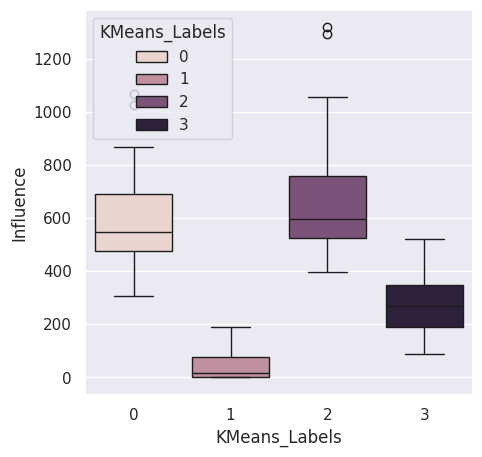

Threat


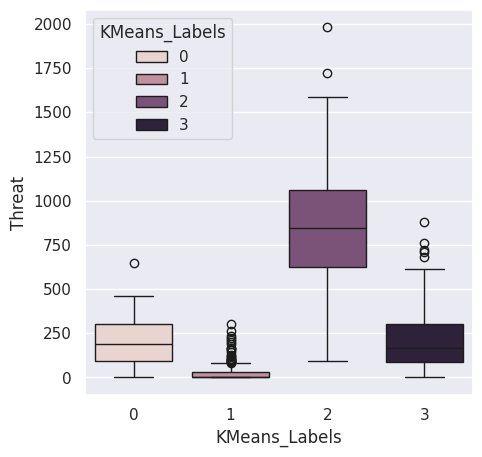

Bonus


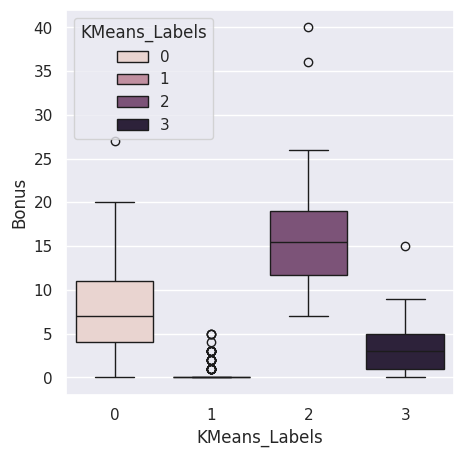

Clean_Sheets


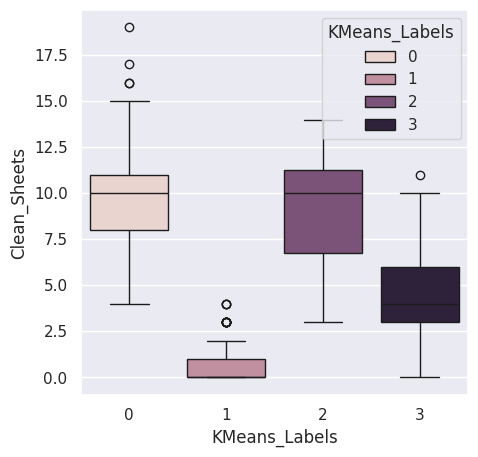

KMeans_Labels


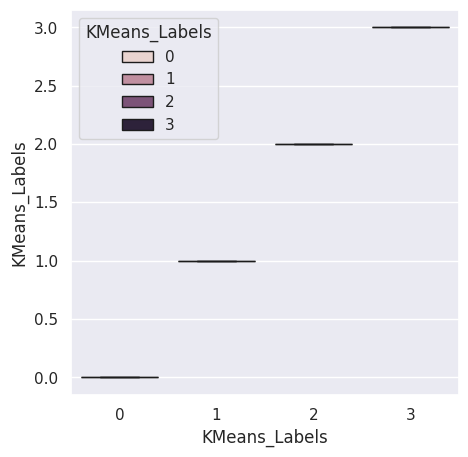

In [504]:
for col in num_cols:
  print(col)
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df_sorted, x='KMeans_Labels', y=col, hue='KMeans_Labels')
  plt.show()

### **Characteristics of each cluster:**

- **Cluster 0**
    - There are 97 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 1**
    - There are 188 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.


- **Cluster 2**
    - There are 62 players in this cluster.
    - Most of the players in this cluster have a lot of goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, high creativity, influence, and scores.
    - Most of the players in this cluster received high bonus points.

-  **Cluster 3**
    - There are 129 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had a moderate game time, a low creativity score, a low influence score, and a moderate threat score.
    - Most of the players in this cluster received low bonus points.

## **K-Medoids Clustering**

- K-Medoids clustering is a variant of K-Means clustering that uses medoids instead of centroids to define the clusters. Medoids are data points within a cluster that have the minimum average dissimilarity to all the other points in the cluster.

- The steps involved in K-Medoids clustering are as follows:
    - Choose the number of clusters K that you want to partition the data into.
    - Initialize K medoids randomly.
    - Assign each data point to the nearest medoid.
    - For each medoid, compute the average dissimilarity to all the other points in the cluster.
    - For each medoid and non-medoid pair, swap the medoid and non-medoid and compute the new total dissimilarity of the cluster.
    - If the total dissimilarity decreases after the swap, keep the new medoid, otherwise keep the old medoid.
    - Repeat steps 3 to 6 until the medoids no longer change or a maximum number of iterations is reached.

K-Medoids clustering is a robust algorithm that can handle non-linear clusters and is less sensitive to outliers compared to K-Means clustering. However, it can be computationally expensive for large datasets, as it requires computing the pairwise dissimilarities between all the data points.

In [505]:
k_med_df = pca_scores.copy()

In [506]:
kmed = KMedoids(n_clusters = 4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(k_med_df)

KMedoids(n_clusters=4, random_state=1)

In [508]:
# Creating a copy of the original data
df_copy2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
k_med_df["KMed_segments"] = kmed.labels_
# Add K-Medoids cluster labels to the whole data
df_copy2["KMed_segments"] =  kmed.labels_

In [509]:
k_med_df.head()

,0,1,2,3,4,5,6,7,8,9,KMed_segments
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269,3
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019,0
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656,1
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934,0
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877,2


In [510]:
df_copy2.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KMed_segments
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,3
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,1
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,2


### **Cluster Profiling**

In [515]:
seg_count = df_copy2['KMed_segments'].value_counts().sort_index()
seg_count

,count
KMed_segments,
0,82
1,87
2,136
3,171


In [518]:
kmed_profile = df_copy2.groupby("KMed_segments").mean(numeric_only = True)
kmed_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
KMed_segments,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965


In [520]:
df_copy2.groupby(["KMed_segments", "Position"])['Player_Name'].count()

KMed_segments  Position  
0              Defender      12
               Forward       21
               Midfielder    49
1              Defender      49
               Goalkeeper    17
               Midfielder    21
2              Defender      50
               Forward       16
               Goalkeeper     3
               Midfielder    67
3              Defender      61
               Forward       27
               Goalkeeper    25
               Midfielder    58
Name: Player_Name, dtype: int64

In [522]:
kmed_profile["count_in_each_segment"] = (df_copy2.groupby("KMed_segments")["Total_Points"].count().values)

kmed_t = kmed_profile.transpose()

kmed_t.style.highlight_max(color = "lightgreen", axis = 0)



KMed_segments,0,1,2,3
Goals_Scored,7.512195,1.068966,1.338235,0.099415
Assists,6.195122,1.091954,1.558824,0.111111
Total_Points,133.243902,99.528736,51.073529,7.736842
Minutes,2452.243902,2638.195402,1270.051471,193.187135
Goals_Conceded,33.853659,36.632184,18.977941,3.362573
Creativity,602.902439,184.582759,180.458824,18.979532
Influence,625.653659,575.818391,242.588235,34.188304
Threat,745.402439,166.333333,203.102941,22.608187
Bonus,14.573171,6.988506,2.904412,0.280702
Clean_Sheets,9.231707,9.931034,4.205882,0.385965


Goals_Scored


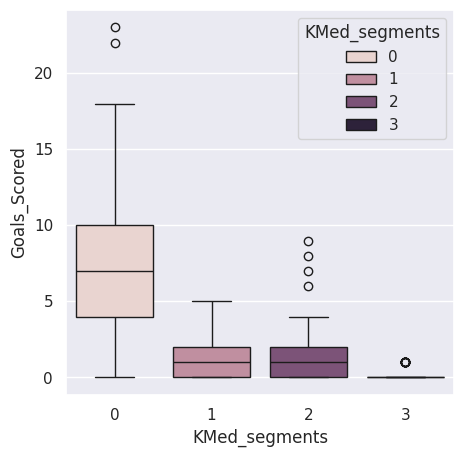

Assists


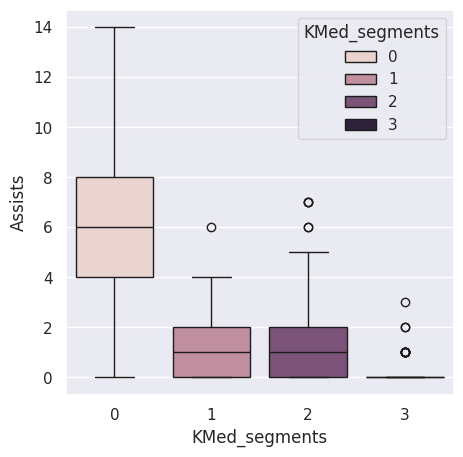

Total_Points


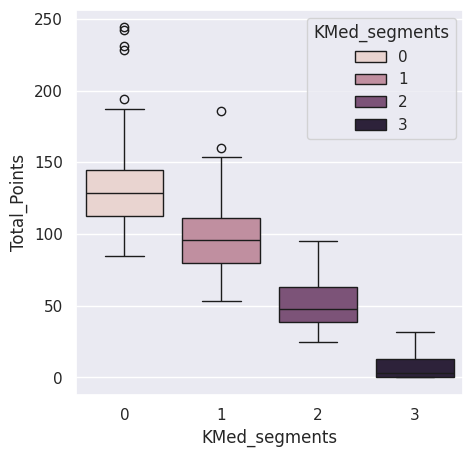

Minutes


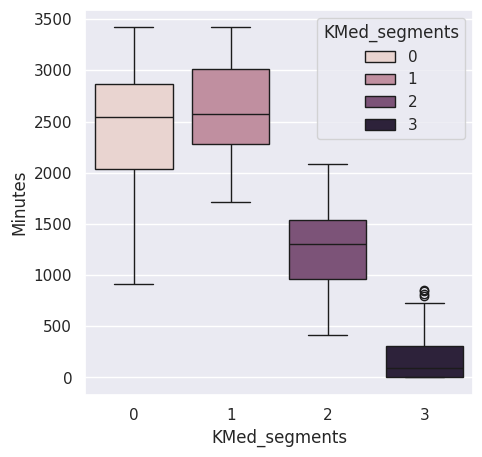

Goals_Conceded


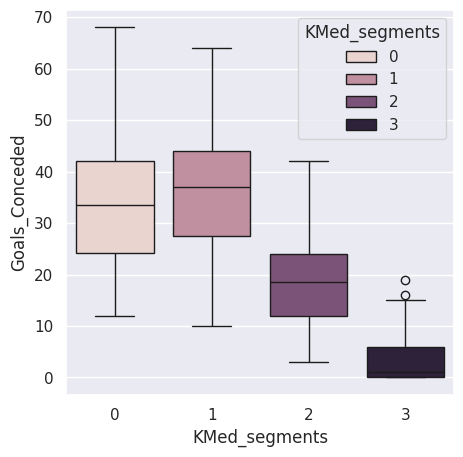

Creativity


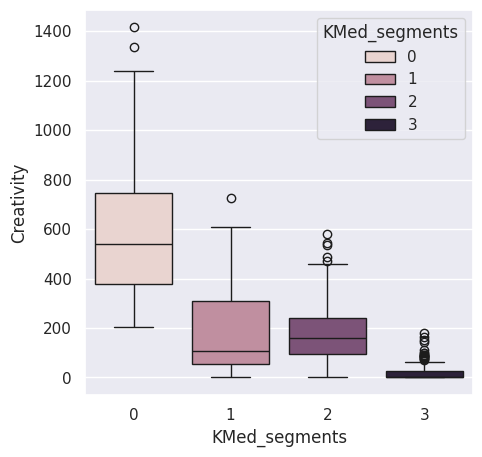

Influence


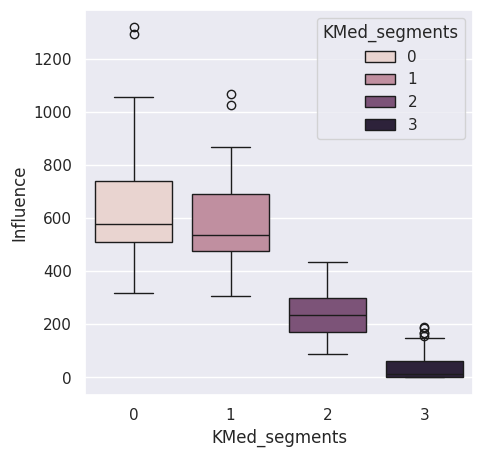

Threat


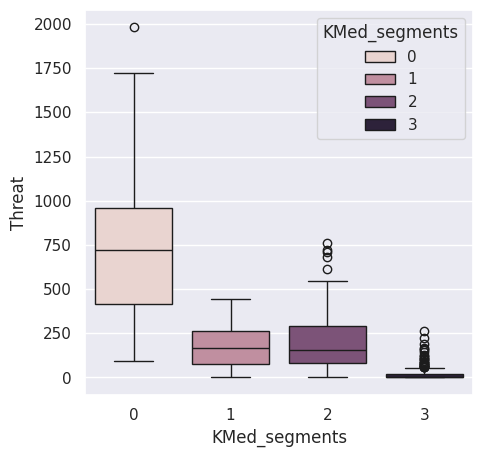

Bonus


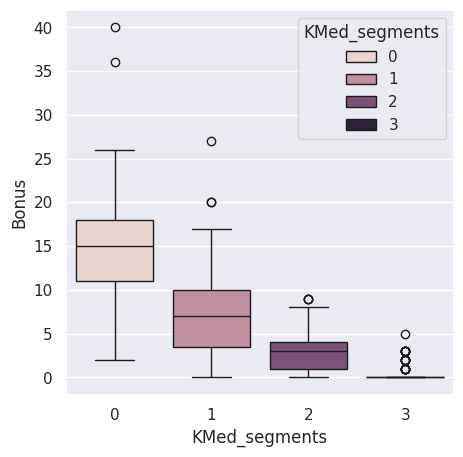

Clean_Sheets


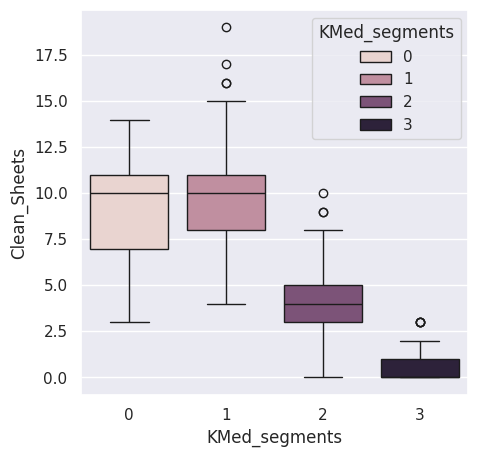

KMed_segments


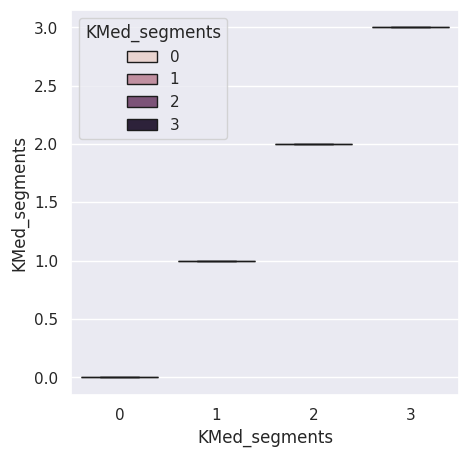

In [526]:
#define number columns
num_cols = df_copy2.select_dtypes(include='number').columns.tolist()

for col in num_cols:
  print(col)
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df_copy2, x='KMed_segments', y=col, hue='KMed_segments')
  plt.show()

### **Comparison of cluster profiles from K-Means and K-Medoids**


1. There is a difference in the distribution of each cluster in both algorithms. The cluster groups in K-Medoids are more evenly distributed since it uses a median which is less likely to get affected by the external data/outliers.
2. The cluster profiles are the same for both algorithms, Cluster number is changing however the cluster profiles remain the same.

 ### **Characteristics of each cluster**
- **Cluster 0**
    - There are 82 players in this cluster.
    - Most of the players in this cluster have high goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a moderate game time with a high creativity score, high influence score, and a moderately high score.
    - Most of the players in this cluster received high bonus points.
    - Most of the players in this cluster received moderate clean sheets with an average of 9.5.
    


- **Cluster 1**
    - There are 87 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a less threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 2**
    - There are 136 players in this cluster.
    - Most of the players in this cluster have moderate goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a moderate game time, with low creativity, influence scores, and moderate threat scores.
    - Most of the players in this cluster received fewer bonus points.


- **Cluster 3**
    - There are 171 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.

## **Hierarchical Clustering**

- Hierarchical clustering is a popular unsupervised learning algorithm used for grouping similar data points into clusters based on the hierarchical structure of the data. The algorithm works by recursively merging the closest data points or clusters until all the data points belong to a single cluster.

- There are two main types of hierarchical clustering: agglomerative and divisive. Agglomerative clustering starts with each data point as a separate cluster and recursively merges the closest clusters until all the data points belong to a single cluster. Divisive clustering, on the other hand, starts with all the data points in a single cluster and recursively splits the clusters until each data point belongs to a separate cluster. Here, we will implement the agglomerative clustering.

- The steps involved in agglomerative clustering are as follows:
    - Assign each data point to a separate cluster.
    - Compute the dissimilarity between each pair of clusters.
    - Merge the two closest clusters into a single cluster.
    - Update the dissimilarity between the new cluster and the remaining clusters.
    - Repeat steps 3 and 4 until all the data points belong to a single cluster.

- Agglomerative clustering can be used with different linkage criteria to compute the dissimilarity between clusters. The most common linkage criteria are:
    - Single linkage: The dissimilarity between two clusters is the distance between the closest two data points in the clusters.
    - Complete linkage: The dissimilarity between two clusters is the distance between the farthest two data points in the clusters.
    - Average linkage: The dissimilarity between two clusters is the average distance between all the data point pairs in the clusters.

Agglomerative clustering can be computationally expensive for large datasets, as it requires computing the pairwise dissimilarities between all the data points. However, it can be useful for datasets where the underlying structure is hierarchical or where the number of clusters is not known a priori.

In [ ]:
data_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877


In [ ]:
hc_df = data_pca.copy()

In [ ]:
hc_df1 = hc_df.copy()

In [ ]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df1, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228708.
Cophenetic correlation for Euclidean distance and complete linkage is 0.741204129226176.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585417.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067481.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111798.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8028394390632132.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302255.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.844849787663964.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132245.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434059.
Cophenetic corr

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df1, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228708.
Cophenetic correlation for complete linkage is 0.741204129226176.
Cophenetic correlation for average linkage is 0.8476499945585417.
Cophenetic correlation for centroid linkage is 0.8068296032280465.
Cophenetic correlation for ward linkage is 0.577773844586155.
Cophenetic correlation for weighted linkage is 0.8624581351067481.
****************************************************************************************************
Highest cophenetic correlation is 0.8624581351067481, which is obtained with weighted linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and weighted linkage.**


**Let's view the dendrograms for the different linkage methods.**

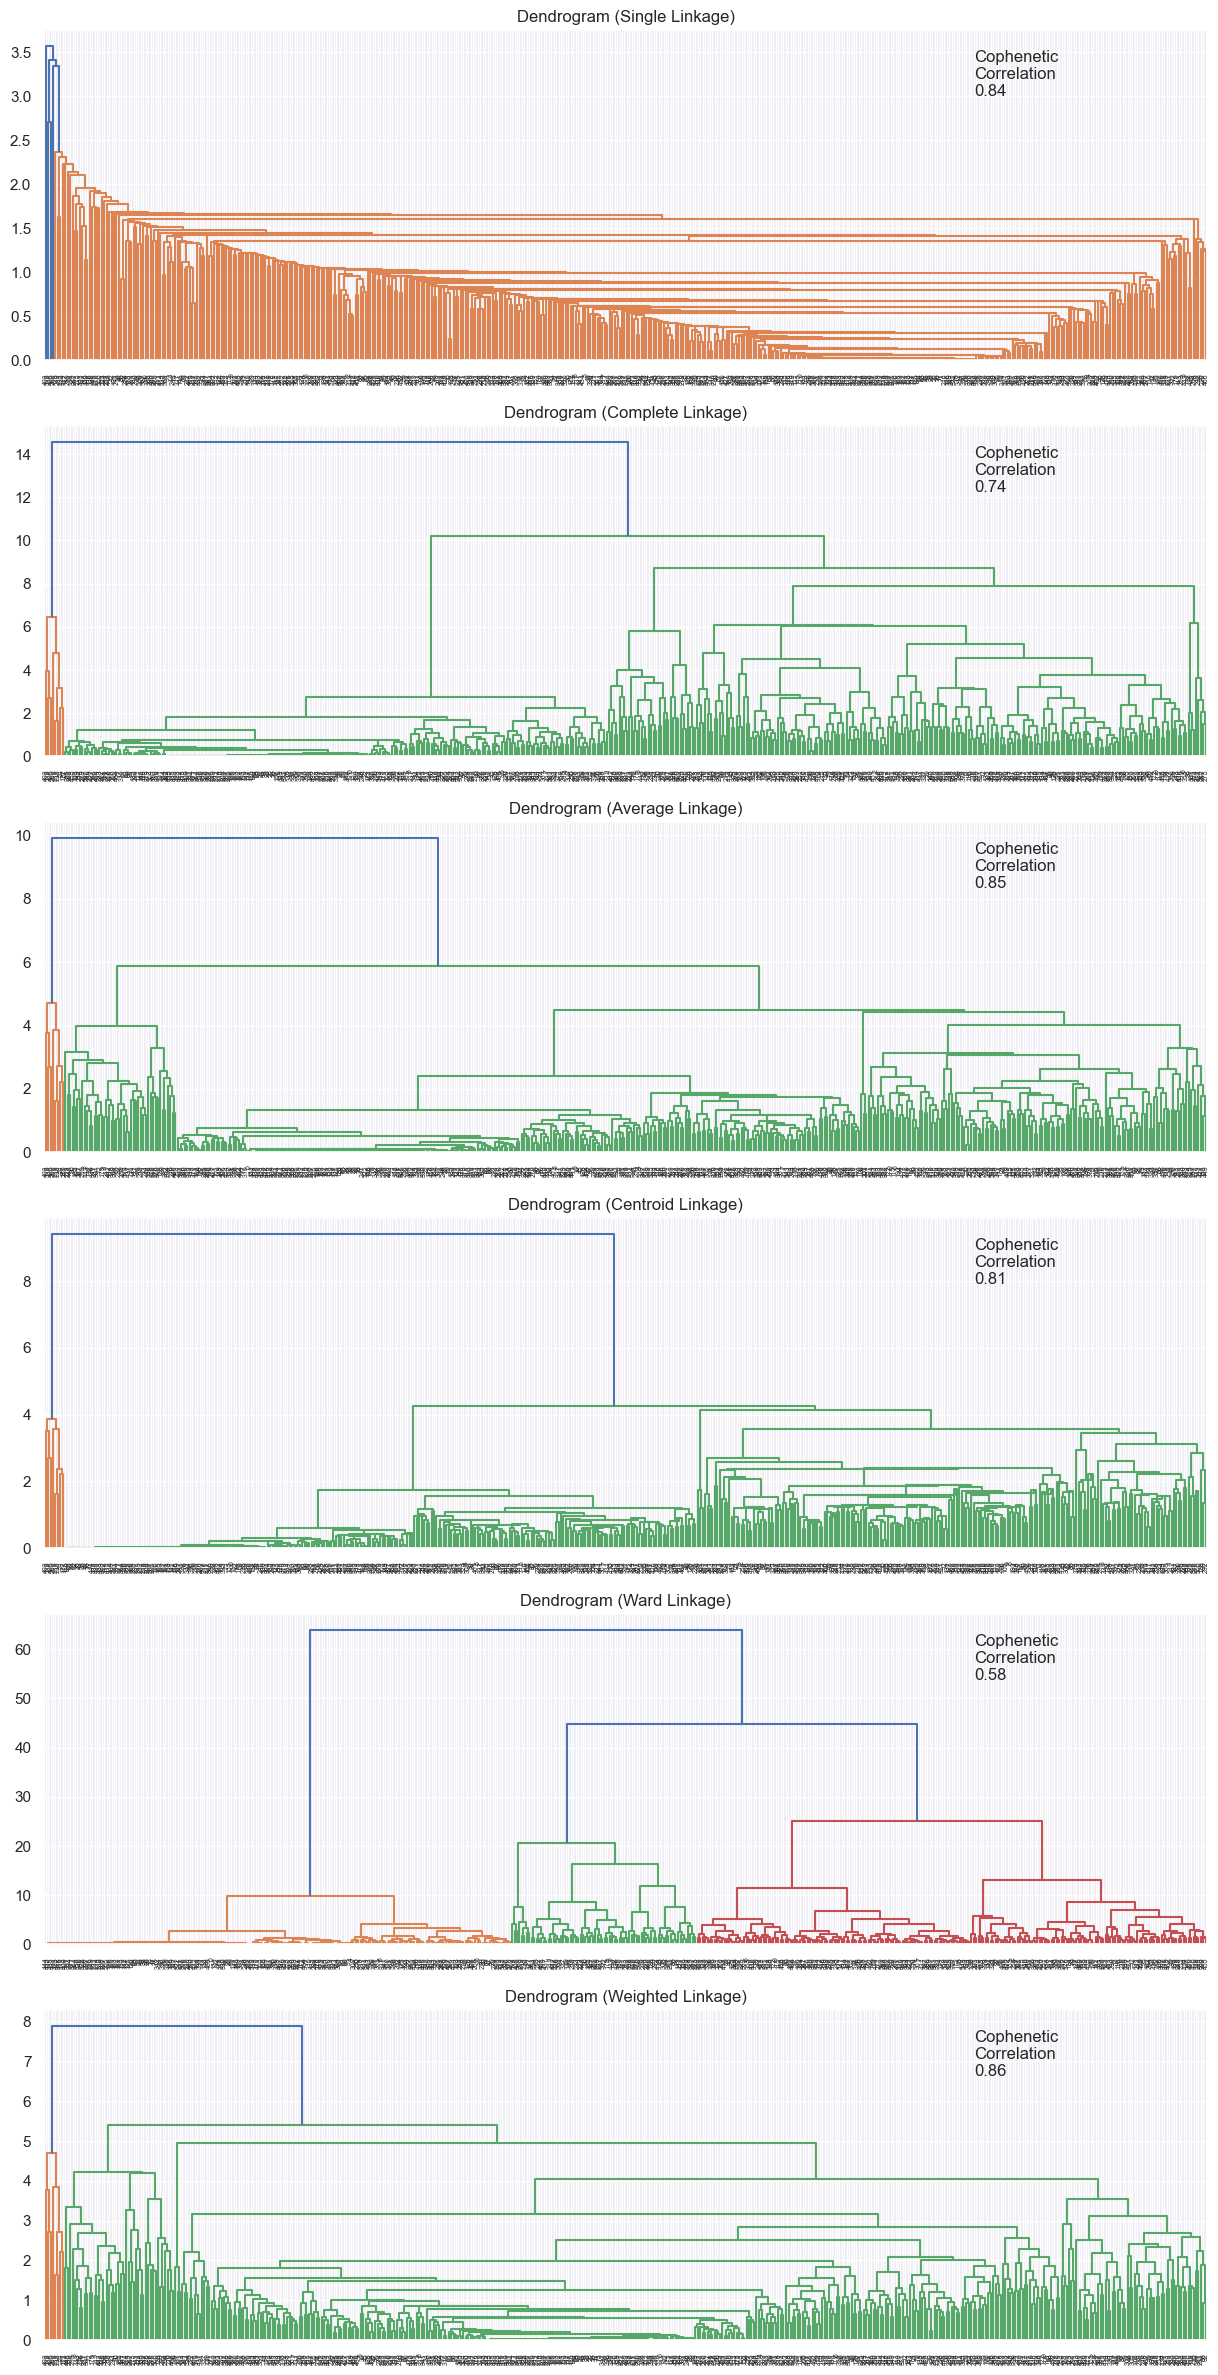

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df1, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)

df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


**Let's move ahead with 4 clusters, Euclidean distance, and average linkage as the sklearn implementation does not support weighted linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "average")
HCmodel.fit(hc_df1)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the original and whole dataframes
hc_df["HC_segments_L1"] = HCmodel.labels_
df3["HC_segments_L1"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df3.groupby("HC_segments_L1").mean(numeric_only = True)

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments_L1")["Total_Points"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments_L1,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [ ]:
# Let's see the names of the players in each cluster
for cl in df3["HC_segments_L1"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L1"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

In [ ]:
df3.groupby(["HC_segments_L1", "Position"])['Player_Name'].count()

HC_segments_L1  Position  
0               Defender      171
                Forward        43
                Goalkeeper     45
                Midfielder    163
1               Forward         4
                Midfielder      1
2               Defender        1
                Forward        16
                Midfielder     29
3               Forward         1
                Midfielder      2
Name: Player_Name, dtype: int64

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [ ]:
hc_df2 = data_pca.copy()

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward")
HCmodel.fit(hc_df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the HC algorithm and original dataframes
hc_df["HC_segments_L2"] = HCmodel.labels_
df3["HC_segments_L2"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df3.groupby("HC_segments_L2").mean(numeric_only = True)

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments_L2")["Total_Points"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments_L2,,,,,,,,,,,
0,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632,76
1,1.357143,1.669643,53.812500,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500,112
2,1.247423,1.206186,98.453608,2557.814433,35.371134,220.125773,556.723711,185.505155,7.237113,9.721649,97
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [ ]:
# Let's see the names of the players in each cluster
for cl in df3["HC_segments_L2"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L2"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

In [ ]:
df3.groupby(["HC_segments_L2", "Position"])['Player_Name'].count()

HC_segments_L2  Position  
0               Defender      10
                Forward       21
                Midfielder    45
1               Defender      38
                Forward       14
                Goalkeeper     3
                Midfielder    57
2               Defender      52
                Goalkeeper    17
                Midfielder    28
3               Defender      72
                Forward       29
                Goalkeeper    25
                Midfielder    65
Name: Player_Name, dtype: int64

- Cluster 0 has no goalkeepers, so it is likely to have players with more offensive duties in the team.
- Cluster 2 has no forwards, so it is likely to have players with more defensive duties in the team.

**The clusters look better now. Let's check the cluster profiles.**

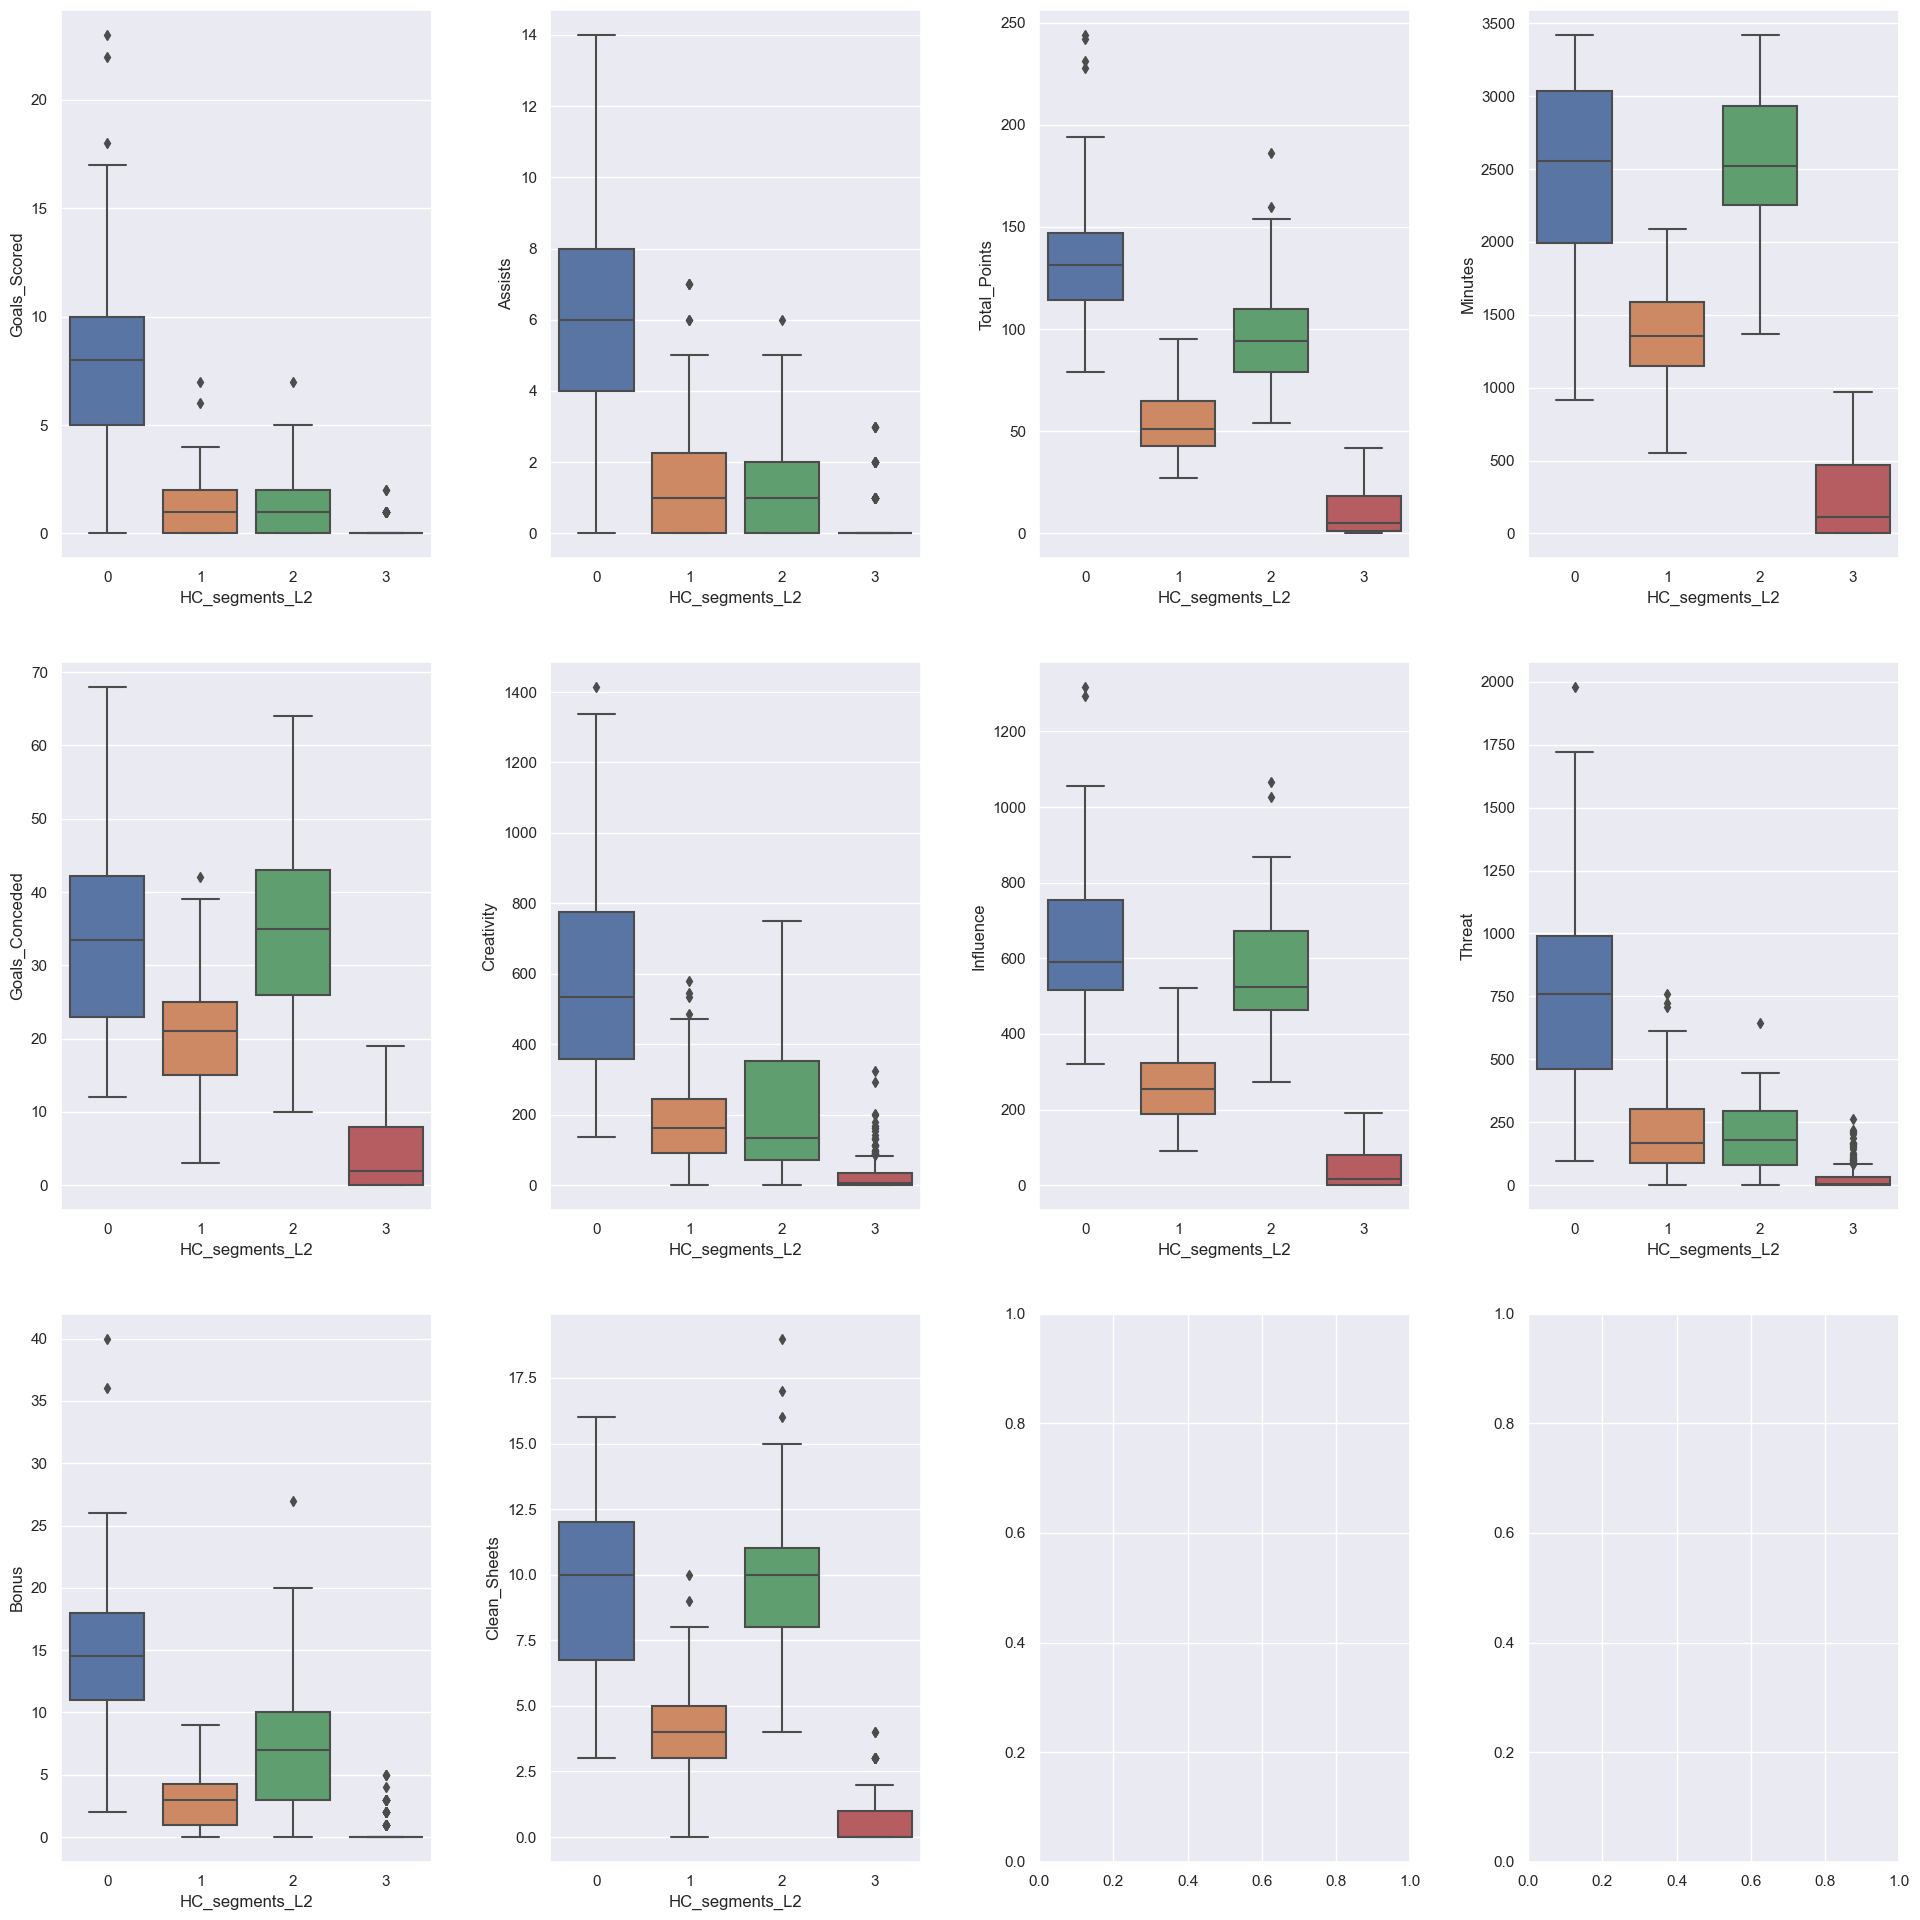

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments_L2",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from Hierarchical and previous algorithms**


1. There is a difference in the distribution of each cluster with the algorithms. Two clusters in the Agglomerative algorithm are distributed similarly whereas rest two groups are grouped with a low and high range value.

2. The cluster profiles are the same for the algorithms, the only difference lies in the cluster number however cluster profiles remain the same.

### **Characteristics of each cluster**

- **Cluster 0**
    - There are 76 players in this cluster.
    - Most of the players in this cluster have a lot of goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, high creativity, influence, and scores.
    - Most of the players in this cluster received high bonus points.


- **Cluster 1**
    - There are 112 players in this cluster.
    - Most of the players in this cluster have a few goals and assists and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had a moderate game time, a low creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received low bonus points.


- **Cluster 2**
    - There are 97 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
    - Most of the players in this cluster received moderate bonus points.


- **Cluster 3**
    - There are 191 players in this cluster.
    - Players in this cluster, except a few, have no goals and assists and did not score any fantasy points scored in the previous season.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Players in this cluster, except a few, received no bonus points.

## **Gaussian Mixture Model (GMM) Clustering**

- Gaussian Mixture Model (GMM) clustering is a probabilistic clustering method that models the data as a mixture of Gaussian distributions. The algorithm works by estimating the parameters of the Gaussian distributions that best fit the data and then assigning each data point to the Gaussian distribution with the highest probability.

- The steps involved in GMM clustering are as follows:
    - Initialize the parameters of the Gaussian distributions, which include the means, covariances, and mixing coefficients.
    - Compute the probability density function of each data point under each Gaussian distribution.
    - Assign each data point to the Gaussian distribution with the highest probability.
    - Update the parameters of the Gaussian distributions based on the data points assigned to them.
    - Repeat steps 2-4 until the parameters converge.

GMM clustering can be used to identify clusters with arbitrary shapes and sizes, as the Gaussian distributions can model different shapes and orientations. Additionally, GMM clustering can estimate the uncertainty of each data point's assignment to a cluster, which can be useful in applications where the data is noisy or ambiguous.

In [ ]:
gmm_df = data_pca.copy()

In [ ]:
# Let's apply Gaussian Mixture
gmm = GaussianMixture(n_components = 4, random_state = 1)  # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df)                                            # Fitting the algorithm on the gmm_df data

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df4 = df.copy()

# Adding GMM cluster labels to the original and scaled dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [ ]:
gmm_cluster_profile = df4.groupby("GMM_segments").mean(numeric_only = True)

In [ ]:
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)


In [ ]:
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [ ]:
# Let's see the names of the players in each cluster
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

In [ ]:
df4.groupby(["GMM_segments", "Position"])['Player_Name'].count()

GMM_segments  Position  
0             Defender      64
              Goalkeeper    18
              Midfielder    34
1             Defender      48
              Forward       21
              Goalkeeper    19
              Midfielder    38
2             Defender      10
              Forward       32
              Midfielder    63
3             Defender      50
              Forward       11
              Goalkeeper     8
              Midfielder    60
Name: Player_Name, dtype: int64

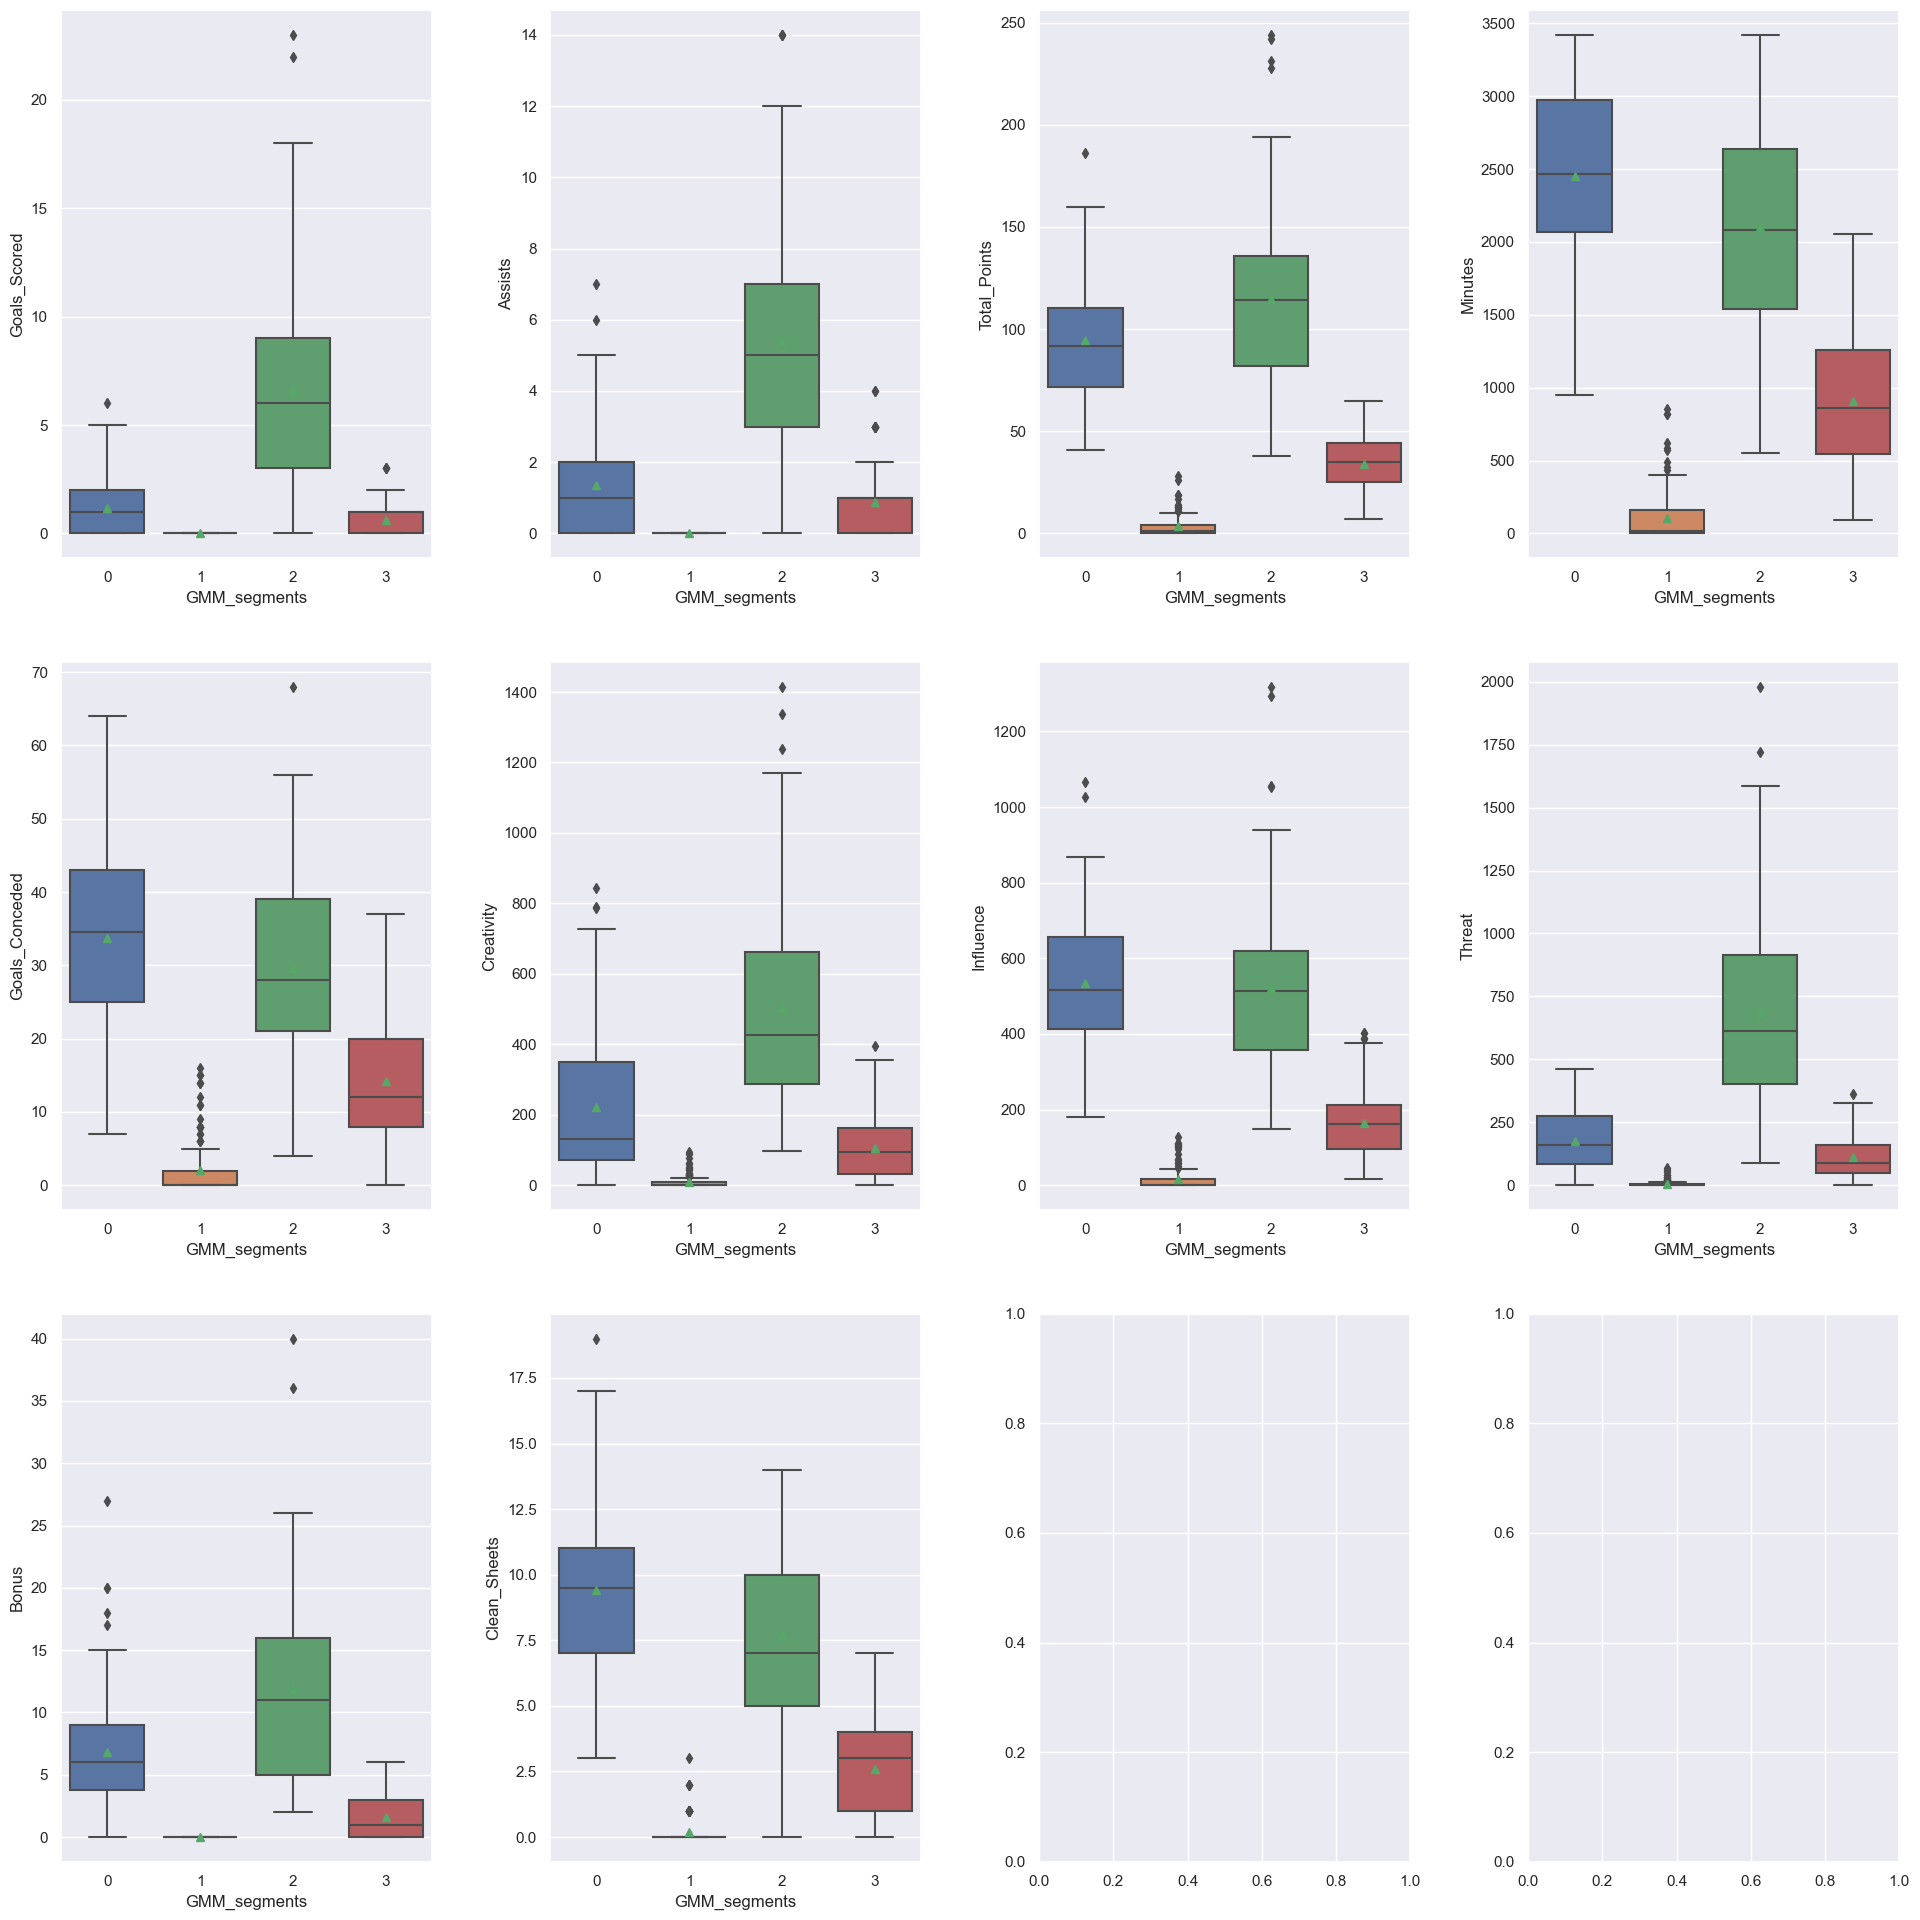

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from GMM and previous algorithms**


1. There is a difference in the distribution of each cluster with the other algorithms. Every cluster in GMM is distributed more or less similarly with the same size.

2. The cluster profiles are the same for all the algorithms, the only difference lies in the cluster number however cluster profiles remain the same.

### **Characteristics of each cluster**

- **Cluster 0**
    - There are 116 players in this cluster.
    - Most of the players in this cluster have moderate goals and assists, and the total fantasy points scored in the previous season are moderate.
    - Most of the players in this cluster had a very high game time, high influence, and moderate creativity scores.
    - Most of the players in this cluster received moderate bonus points.
    - Most of the players in this cluster received high clean sheets with an average of 9.43.


- **Cluster 1**
    - There are 126 players in this cluster.
    - The players in this cluster haven't scored goals and assists and the total fantasy points scored in the previous season are very low.
    - Most of the players in this cluster had a very low game time, and very low creativity, influence, and threat scores.
    - The players in this cluster haven't received any bonus points.


- **Cluster 2**
    - There are 105 players in this cluster.
    - Most of the players in this cluster have high goals and assists, and the total fantasy points scored in the previous season are high.
    - Most of the players in this cluster had a high game time, a moderate influence score, a high creativity score, and a moderate threat score.
    - Most of the players in this cluster received the highest bonus points.


- **Cluster 3**
    - There are 129 players in this cluster.
    - Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
    - Most of the players in this cluster had moderate game time, low creativity, influence, and threat scores.
    - Most of the players in this cluster received low bonus points.

## **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

- DBSCAN is a clustering algorithm that groups together points that are closely packed together while marking points that are not part of any cluster as noise. The algorithm works by defining a neighborhood around each point and then determining whether the point is a core point, a border point, or a noise point based on the density of points within the neighborhood.

- The steps involved in DBSCAN are as follows:
    - Define a neighborhood around each point using a distance metric and a radius.
    - Identify the core points as those that have at least a minimum number of points within their neighborhood.
    - Connect the core points to their directly reachable neighbors to form clusters.
    - Identify the border points as those that are not core points but belong to a cluster.
    - Assign the noise points to their own separate cluster.

DBSCAN can be useful for datasets with irregular shapes or where the number of clusters is not known a priori. It can also handle noisy data by assigning it to its own separate cluster. Additionally, DBSCAN does not require the specification of the number of clusters or assumptions about the shape of the clusters.

It is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, eps, and min samples. Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [ ]:
dbscan_df = data_pca.copy()
dbscan_df1 = dbscan_df.copy()

In [ ]:
# Initializing lists
eps_value = [2,3]           # Taking random eps value
min_sample_values = [6,20]  # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combination

high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBSCAN to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)          # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combination
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5283008912823889
For eps value =2 For min sample =20 The average silhoutte_score is : 0.3647818751696756
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [ ]:
# Applying DBSCAN with eps as 3 and min sample as 20
dbs = DBSCAN(eps = 3, min_samples = 20)

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df1["db_segments"] = dbs.fit_predict(dbscan_df1)

# Add DBSCAN cluster labels to whole data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

In [ ]:
db_cluster_profile = df5.groupby("db_segments").mean(numeric_only = True)

In [ ]:
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [ ]:
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,470


**Observations:**

- DBSCAN was able to give only two clusters with eps = 3 and min_sample = 20 which is very skewed.  
- It is not able to perform well on this dataset.

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init = 'auto')        # Initializing K-Means with number of clusters as 4 and random_state=1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)

0.40411092686635713


In [ ]:
kmedoids = KMedoids(n_clusters = 4, random_state = 1)   # Initializing K-Medoids with number of clusters as 4 and random_state=1

preds = kmedoids.fit_predict((data_pca))                # Fitting and predicting K-Medoids on data_pca

score = silhouette_score(data_pca, preds)               # Calculating the silhouette score

print(score)

0.393822499693573


In [ ]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward",)

# Fitting on PCA data
preds = HCmodel.fit_predict(data_pca)

score = silhouette_score(data_pca, preds)             # Calculating the silhouette score

print(score)

0.3849709986025467


In [ ]:
# Initializing Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds = gmm.fit_predict((data_pca))

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)

# Printing the score
print(score)

0.28494644297302146


- Based on the silhouette score, we can see that K-Means algorithm giving the best score on the data. We would proceed K-Means as the best algorithm.

## **Conclusion:**

- The players who have a greater influence on the outcome of the game typically play for a longer duration every game and score more fantasy points.
- The players can be sold for more money who have higher goals scored, creativity, and influence.
- Since there is a drop at K = 4 in the elbow plot, we selected K as 4 for clustering.
- We implemented five algorithms, but we have chosen K-Means algorithm as the final algorithm because it has the highest silhouette score of 0.40.


## **Recommendations:**

- **Cluster 2** players are the top players for fantasy. They fetch more points and have a higher chance of getting bonus points too. These players should be priced higher than the others so that it will be difficult to accommodate too many of them in the same team (because of the fixed budget) and fantasy managers have to make wise choices.


- **Cluster 3** players are players who do not play many minutes, most likely come on as substitutes and fetch lesser fantasy points as a result. These players should be priced low and can be good differential picks.


- **Cluster 0** are the players who are influential in their team's play but do not tend to score or assist much, resulting in lesser fantasy points than the Cluster 2 players. These players should be priced somewhere between Cluster 2 and Cluster 3 players.


- **Cluster 1** has the players who are in the squad to provide backup in case any of the starting 11 players get injured. They get lower game time and barely get any fantasy points. These players should be priced the lowest among the 4 clusters.


- Player performances from previous seasons should be taken into account and fantasy prices from the previous season should be referred to as a benchmark to determine the price for the upcoming season.


- OnSports should conduct cluster analysis separately for each of the playing positions to arrive at a better fantasy pricing strategy.